In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [11]:
#Read data into an array
df = pd.read_excel("NST_survey_091225_1515.xlsx")
column_names = df.columns.to_numpy()
data = df.to_numpy()

In [12]:
#Split columns based on demographics and artists
demographics = data[:,:10]
demographics_column_names = column_names[:10]
LF_data = data[:,10:33]
LF_column_names = column_names[10:33]
PM_data = data[:,33:56]
PM_column_names = column_names[33:56]
VG_data = data[:,56:]
VG_column_names = column_names[56:]

In [13]:
#LF Statistics
#Convert this to float so I don't end up doing integer arithmetic
LF_match_data = LF_data[:,20].astype(np.float64)
LF_quality_data = LF_data[:,21].astype(np.float64)

#Find basic info for how well NST matched LF style
LF_match_mean = np.mean(LF_match_data)
LF_match_median = np.median(LF_match_data)
LF_match_std = np.std(LF_match_data)
print(LF_match_mean,LF_match_median,LF_match_std)

#Find basic info for how well NST matched LF quality
LF_quality_mean = np.mean(LF_quality_data)
LF_quality_median = np.median(LF_quality_data)
LF_quality_std = np.std(LF_quality_data)
print(LF_quality_mean,LF_quality_median,LF_quality_std)

5.895833333333333 6.0 2.224293739344893
5.739583333333333 6.0 2.619020139872077


In [14]:
#PM Statistics
#Convert this to float so I don't end up doing integer arithmetic
PM_match_data = PM_data[:,20].astype(np.float64)
PM_quality_data = PM_data[:,21].astype(np.float64)

#Find basic info for how well NST matched PM style
PM_match_mean = np.mean(PM_match_data)
PM_match_median = np.median(PM_match_data)
PM_match_std = np.std(PM_match_data)
print(PM_match_mean,PM_match_median,PM_match_std)

#Find basic info for how well NST matched PM quality
PM_quality_mean = np.mean(PM_quality_data)
PM_quality_median = np.median(PM_quality_data)
PM_quality_std = np.std(PM_quality_data)
print(PM_quality_mean,PM_quality_median,PM_quality_std)

6.125 7.0 2.6388523389281686
6.010416666666667 7.0 2.5145194689487336


In [15]:
#VG Statistics
#Convert this to float so I don't end up doing integer arithmetic
VG_match_data = VG_data[:,20].astype(np.float64)
VG_quality_data = VG_data[:,21].astype(np.float64)

#Find basic info for how well NST matched VG style
VG_match_mean = np.mean(VG_match_data)
VG_match_median = np.median(VG_match_data)
VG_match_std = np.std(VG_match_data)
print(VG_match_mean,VG_match_median,VG_match_std)

#Find basic info for how well NST matched VG quality
VG_quality_mean = np.mean(VG_quality_data)
VG_quality_median = np.median(VG_quality_data)
VG_quality_std = np.std(VG_quality_data)
print(VG_quality_mean,VG_quality_median,VG_quality_std)

6.125 7.0 2.5668154718769065
6.135416666666667 7.0 2.4774810446073827


In [16]:
#Combined Statistics
all_match_data = np.concatenate((LF_match_data,PM_match_data,VG_match_data))
all_quality_data = np.concatenate((LF_quality_data,PM_quality_data,VG_quality_data))

#Find basic info for how well NST matched all combined style
all_match_mean = np.mean(all_match_data)
all_match_median = np.median(all_match_data)
all_match_std = np.std(all_match_data)
print(all_match_mean,all_match_median,all_match_std)

#Find basic info for how well NST matched all combined quality
all_quality_mean = np.mean(all_quality_data)
all_quality_median = np.median(all_quality_data)
all_quality_std = np.std(all_quality_data)
print(all_quality_mean,all_quality_median,all_quality_std)

6.048611111111111 7.0 2.4855970138846115
5.961805555555555 7.0 2.5430869400029525


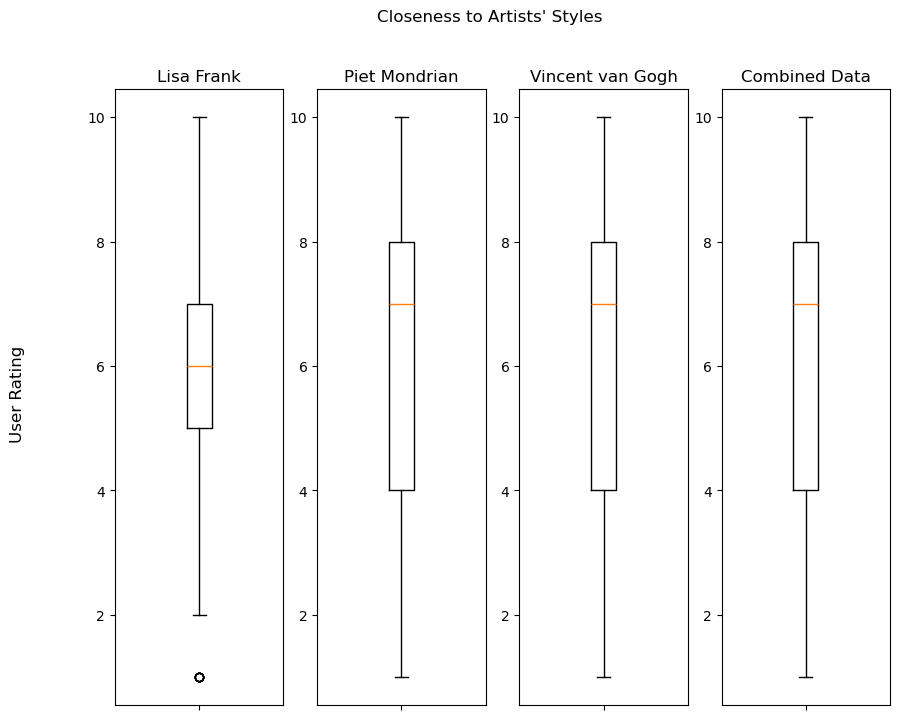

In [17]:
#CLoseness to Artists Styles
fig, axs = plt.subplots(1, 4, figsize=(10, 8))
fig.suptitle("Closeness to Artists' Styles")

# Plot each graph
axs[0].boxplot(LF_match_data)
axs[0].set_title("Lisa Frank")

axs[1].boxplot(PM_match_data)
axs[1].set_title("Piet Mondrian")

axs[2].boxplot(VG_match_data)
axs[2].set_title("Vincent van Gogh")

axs[3].boxplot(all_match_data)
axs[3].set_title("Combined Data")

for ax in axs.flat:
    ax.set_xticklabels("")
fig.supylabel("User Rating")

#plt.tight_layout()
plt.show()
fig.savefig("./Graphs/ClosenesstoArtistsStyles.png")

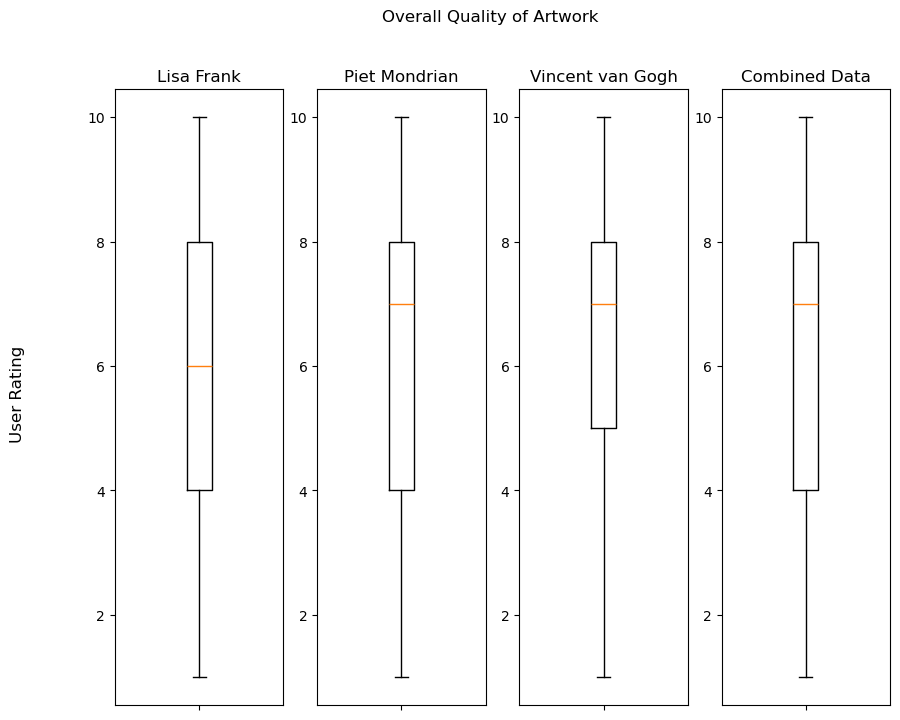

In [18]:
#CLoseness to Artists Styles
fig, axs = plt.subplots(1, 4, figsize=(10, 8))
fig.suptitle("Overall Quality of Artwork")

# Plot each graph
axs[0].boxplot(LF_quality_data)
axs[0].set_title("Lisa Frank")

axs[1].boxplot(PM_quality_data)
axs[1].set_title("Piet Mondrian")

axs[2].boxplot(VG_quality_data)
axs[2].set_title("Vincent van Gogh")

axs[3].boxplot(all_quality_data)
axs[3].set_title("Combined Data")


for ax in axs.flat:
    ax.set_xticklabels("")
fig.supylabel("User Rating")

#plt.tight_layout()
plt.show()
fig.savefig("./Graphs/OverallQualityofArtwork.png")

In [19]:
#Let's look at our image quality metric data from our LF
import matplotlib.pyplot as plt
networks = ["DenseNet", "GoogleNet","ResNet","SqueezeNet","VGG"]
survey_choices = ["A","B","C","D","E"]

#Get the style matching and user preference data
LF_style_survey = LF_data[:,0:20:5]
LF_like_survey = LF_data[:,2:20:5]
PM_style_survey = PM_data[:,0:20:5]
PM_like_survey = PM_data[:,2:20:5]
VG_style_survey = VG_data[:,0:20:5]
VG_like_survey = VG_data[:,2:20:5]

#Get response count, number of images
size = LF_data.shape[0] # number of responses
image_number = LF_style_survey.shape[1] #number of unique images

In [20]:
all_like_survey = np.concatenate([LF_like_survey, PM_like_survey, VG_like_survey], axis=1)
all_style_survey = np.concatenate([LF_style_survey, PM_style_survey, VG_style_survey], axis=1)
all_image_number = all_like_survey.shape[1]
print(LF_style_survey.shape)
print(all_style_survey.shape)
all_style_survey

(96, 4)
(96, 12)


array([['A', 'A', 'A', ..., 'A', 'A', 'A'],
       ['A', 'A', 'C', ..., 'A', 'A', 'A'],
       ['A', 'B', 'C', ..., 'D', 'A', 'C'],
       ...,
       ['A', 'A', 'A', ..., 'C', 'D', 'A'],
       ['A', 'C', 'A', ..., 'C', 'A', 'A'],
       ['A', 'C', 'A', ..., 'A', 'A', 'B']], shape=(96, 12), dtype=object)

In [46]:
def calc_preferred_network_ratio(survey, image_number, num_responses):
    total_ratio = np.array([])
    for num in range(0,image_number):
        image_subset = survey[:,num]
        for count in survey_choices:
            ratio = np.count_nonzero((image_subset == count)) / num_responses
            total_ratio = np.append(total_ratio,[ratio])
    return total_ratio

def calc_preferred_network_average(ratios, image_number, network_count):
    average_ratio = np.array([])
    for network  in range(0, network_count):
        ratio = 0.0
        for img in range(0, image_number):
            offset = network + (img * network_count)
            ratio = ratio + ratios[offset]
        ratio = ratio / image_number
        average_ratio = np.append(average_ratio, [ratio])
    return average_ratio
                                  
            

In [47]:
LF_style_ratio = calc_preferred_network_ratio(LF_style_survey, image_number, size)
LF_like_ratio = calc_preferred_network_ratio(LF_like_survey, image_number, size)
PM_style_ratio = calc_preferred_network_ratio(PM_style_survey, image_number, size)
PM_like_ratio = calc_preferred_network_ratio(PM_like_survey, image_number, size)
VG_style_ratio = calc_preferred_network_ratio(VG_style_survey, image_number, size)
VG_like_ratio = calc_preferred_network_ratio(VG_like_survey, image_number, size)
all_style_ratio = calc_preferred_network_ratio(all_style_survey, all_image_number, size)
all_like_ratio = calc_preferred_network_ratio(all_like_survey, all_image_number, size)

print(LF_style_ratio,"\n")
print(LF_like_ratio, "\n")
print(PM_style_ratio,"\n")
print(PM_like_ratio, "\n")
print(VG_style_ratio,"\n")
print(VG_like_ratio, "\n")
print(all_style_ratio,"\n")
print(all_like_ratio, "\n")
print(LF_style_ratio.shape)


[0.51041667 0.13541667 0.30208333 0.02083333 0.03125    0.54166667
 0.125      0.20833333 0.09375    0.03125    0.4375     0.16666667
 0.33333333 0.02083333 0.04166667 0.28125    0.10416667 0.4375
 0.10416667 0.07291667] 

[0.27083333 0.13541667 0.42708333 0.10416667 0.0625     0.3125
 0.16666667 0.35416667 0.125      0.04166667 0.27083333 0.08333333
 0.46875    0.0625     0.11458333 0.21875    0.08333333 0.51041667
 0.14583333 0.04166667] 

[0.14583333 0.23958333 0.20833333 0.08333333 0.32291667 0.22916667
 0.20833333 0.13541667 0.3125     0.11458333 0.625      0.07291667
 0.16666667 0.0625     0.07291667 0.65625    0.04166667 0.17708333
 0.0625     0.0625    ] 

[0.13541667 0.09375    0.5625     0.09375    0.11458333 0.10416667
 0.11458333 0.52083333 0.125      0.13541667 0.3125     0.16666667
 0.27083333 0.09375    0.15625    0.22916667 0.11458333 0.5
 0.10416667 0.05208333] 

[0.48958333 0.04166667 0.36458333 0.04166667 0.0625     0.71875
 0.0625     0.09375    0.0625     0.0625   

In [48]:
network_count = len(networks)

LF_style_avg = calc_preferred_network_average(LF_style_ratio, image_number, network_count)
LF_like_avg = calc_preferred_network_average(LF_like_ratio, image_number, network_count)
PM_style_avg = calc_preferred_network_average(PM_style_ratio, image_number, network_count)
PM_like_avg = calc_preferred_network_average(PM_like_ratio, image_number, network_count)
VG_style_avg = calc_preferred_network_average(VG_style_ratio, image_number, network_count)
VG_like_avg = calc_preferred_network_average(VG_like_ratio, image_number, network_count)
all_style_avg = calc_preferred_network_average(all_style_ratio, all_image_number, network_count)
all_like_avg = calc_preferred_network_average(all_like_ratio, all_image_number, network_count)

print(LF_style_avg,"\n")
print(LF_like_avg, "\n")
print(PM_style_avg,"\n")
print(PM_like_avg, "\n")
print(VG_style_avg,"\n")
print(VG_like_avg, "\n")
print(all_style_avg,"\n")
print(all_like_avg, "\n")
print(LF_style_avg.shape)

[0.44270833 0.1328125  0.3203125  0.05989583 0.04427083] 

[0.26822917 0.1171875  0.44010417 0.109375   0.06510417] 

[0.4140625  0.140625   0.171875   0.13020833 0.14322917] 

[0.1953125  0.12239583 0.46354167 0.10416667 0.11458333] 

[0.64322917 0.07552083 0.18489583 0.03645833 0.05989583] 

[0.3671875  0.15104167 0.2890625  0.07291667 0.11979167] 

[0.5        0.11631944 0.22569444 0.07552083 0.08246528] 

[0.27690972 0.13020833 0.39756944 0.09548611 0.09982639] 

(5,)


In [63]:
plt.pie(LF_style_avg, labels = networks, autopct="%.2f")
plt.title("Lisa Frank Best Matches Style")
image_file = "./Graphs/LisaFrankBestMatchesStyle.png"
plt.savefig(image_file)
plt.close()

plt.pie(PM_style_avg, labels = networks, autopct="%.2f")
plt.title("Piet Mondrian Best Matches Style")
image_file = "./Graphs/PietMondrianBestMatchesStyle.png"
plt.savefig(image_file)
plt.close()

plt.pie(VG_style_avg, labels = networks, autopct="%.2f")
plt.title("Vincent van Gogh Best Matches Style")
image_file = "./Graphs/VincentvanGoghBestMatchesStyle.png"
plt.savefig(image_file)
plt.close()

plt.pie(all_style_avg, labels = networks, autopct="%.2f")
plt.title("All Images Best Matches Style")
image_file = "./Graphs/AllImagesBestMatchesStyle.png"
plt.savefig(image_file)
plt.close()


In [64]:
plt.pie(LF_like_avg, labels = networks, autopct="%.2f")
plt.title("Lisa Frank Preferred Image")
image_file = "./Graphs/LisaFrankPreferred.png"
plt.savefig(image_file)
plt.close()

plt.pie(PM_like_avg, labels = networks, autopct="%.2f")
plt.title("Piet Mondrian Preferred Image")
image_file = "./Graphs/PietMondrianPreferred.png"
plt.savefig(image_file)
plt.close()

plt.pie(VG_like_avg, labels = networks, autopct="%.2f")
plt.title("Vincent van Gogh Best Matches Style")
image_file = "./Graphs/VincentvanGoghPreferred.png"
plt.savefig(image_file)
plt.close()

plt.pie(all_like_avg, labels = networks, autopct="%.2f")
plt.title("All Images Preferred Image")
image_file = "./Graphs/AllImagesPreferred.png"
plt.savefig(image_file)
plt.close()


In [66]:
#Image Quality Data
df_lfiq = pd.read_csv("iqs_LF.csv")
lfiq_column_names = df_lfiq.columns.to_numpy()
lfiq_data = df_lfiq.to_numpy()[:,4:]

df_pmiq = pd.read_csv("iqs_PM.csv")
pmiq_column_names = df_pmiq.columns.to_numpy()
pmiq_data = df_pmiq.to_numpy()[:,4:]

df_vgiq = pd.read_csv("iqs_VG.csv")
vgiq_column_names = df_vgiq.columns.to_numpy()
vgiq_data = df_vgiq.to_numpy()[:,4:]

alliq_data = np.concatenate([lfiq_data, pmiq_data, vgiq_data], axis=0)

#print(vgiq_data)
print(alliq_data)

[[0.775622487068176 0.542287349700928 12.411937713623 0.470242431593819
  41.5654907226563 6.37201220769228 48.6218566894531]
 [0.796085774898529 0.489980220794678 12.7579498291016 0.367449979892909
  80.0164184570313 10.3742502154203 62.5957946777344]
 [0.829512596130371 0.447377264499664 14.1602725982666 0.57229484857297
  36.5951538085938 5.24063405528506 47.9129753112793]
 [0.764670252799988 0.476443946361542 12.90625 0.348698464481091
  68.113037109375 12.2155432748955 56.6313514709473]
 [0.685046851634979 0.556564748287201 12.7799940109253 0.476870010145537
  19.9718627929688 3.8258131391211 32.8780250549316]
 [0.722525358200073 0.604415833950043 11.407790184021 0.364413760548036
  48.5432739257813 5.88042077693323 47.4877433776856]
 [0.784963130950928 0.494849145412445 11.7958307266235 0.336101760403328
  82.1571655273438 9.98680406700827 61.3434677124023]
 [0.786005437374115 0.498934835195541 12.1988315582275 0.48431582174601
  49.5250854492188 5.20987370471279 47.8803672790527

In [321]:
metrics = ['fsim', 'lpips', 'psnr', 'ssim', 'brisque', 'niqe', 'piqe']
metric_count = len(metrics)

def calc_pearson(iq_data, metric_count, ratio_data):
    pearson_data = np.array([])
    for col in range(0,metric_count):
        Y = iq_data[:,col].astype(np.float64)
        r = np.corrcoef(ratio_data, Y)[0,1]
        pearson_data = np.append(pearson_data,[r])
    return pearson_data

def graph_pearson(iq_data, metric_count, ratio_data, title, xlabel = "", ylabel = ""):
    fig, axs = plt.subplots(1, metric_count, figsize=(30, 6))
    for col in range(0,metric_count):
        Y = iq_data[:,col].astype(np.float64)
        r = np.corrcoef(ratio_data, Y)[0,1]
        axs[col].scatter(ratio_data, Y)
        axs[col].set_title(f"{metrics[col]}\nr = {r:.2f}")
        #axs[col].set_xticklabels("Pref. Image Ratio")
        #axs[col].set_yticklabels("Image Quality")
    fig.suptitle(title)
    fig.supxlabel(xlabel)
    fig.supylabel(ylabel)
    plt.show()
    image_file = "./Graphs/" + title.replace(" ", "") + ".png"
    fig.savefig(image_file)
    return

In [322]:
LF_like_pc = calc_pearson(lfiq_data, metric_count, LF_like_ratio)
LF_style_pc = calc_pearson(lfiq_data, metric_count, LF_style_ratio)
PM_like_pc = calc_pearson(pmiq_data, metric_count, PM_like_ratio)
PM_style_pc = calc_pearson(pmiq_data, metric_count, PM_style_ratio)
VG_like_pc = calc_pearson(vgiq_data, metric_count, VG_like_ratio)
VG_style_pc = calc_pearson(vgiq_data, metric_count, VG_style_ratio)
all_like_pc = calc_pearson(alliq_data, metric_count, all_like_ratio)
all_style_pc = calc_pearson(alliq_data, metric_count, all_style_ratio)

print(LF_like_pc)
#print(LF_style_pc)
print(PM_like_pc)
#print(PM_style_pc)
print(VG_like_pc)
#print(VG_style_pc)
print(all_like_pc)
#print(all_style_pc)

[ 0.24218893 -0.32117111 -0.01024199  0.34622294 -0.29821422 -0.32408062
 -0.07608826]
[ 0.44752398 -0.53814596  0.57112393  0.55718005 -0.46998614 -0.43291792
 -0.31871332]
[ 0.21316516 -0.20613037 -0.38566257  0.23567139  0.19818244  0.01788408
  0.14551162]
[ 0.21844893 -0.22691864  0.05254774  0.26247125 -0.24320841 -0.27089388
 -0.0712045 ]


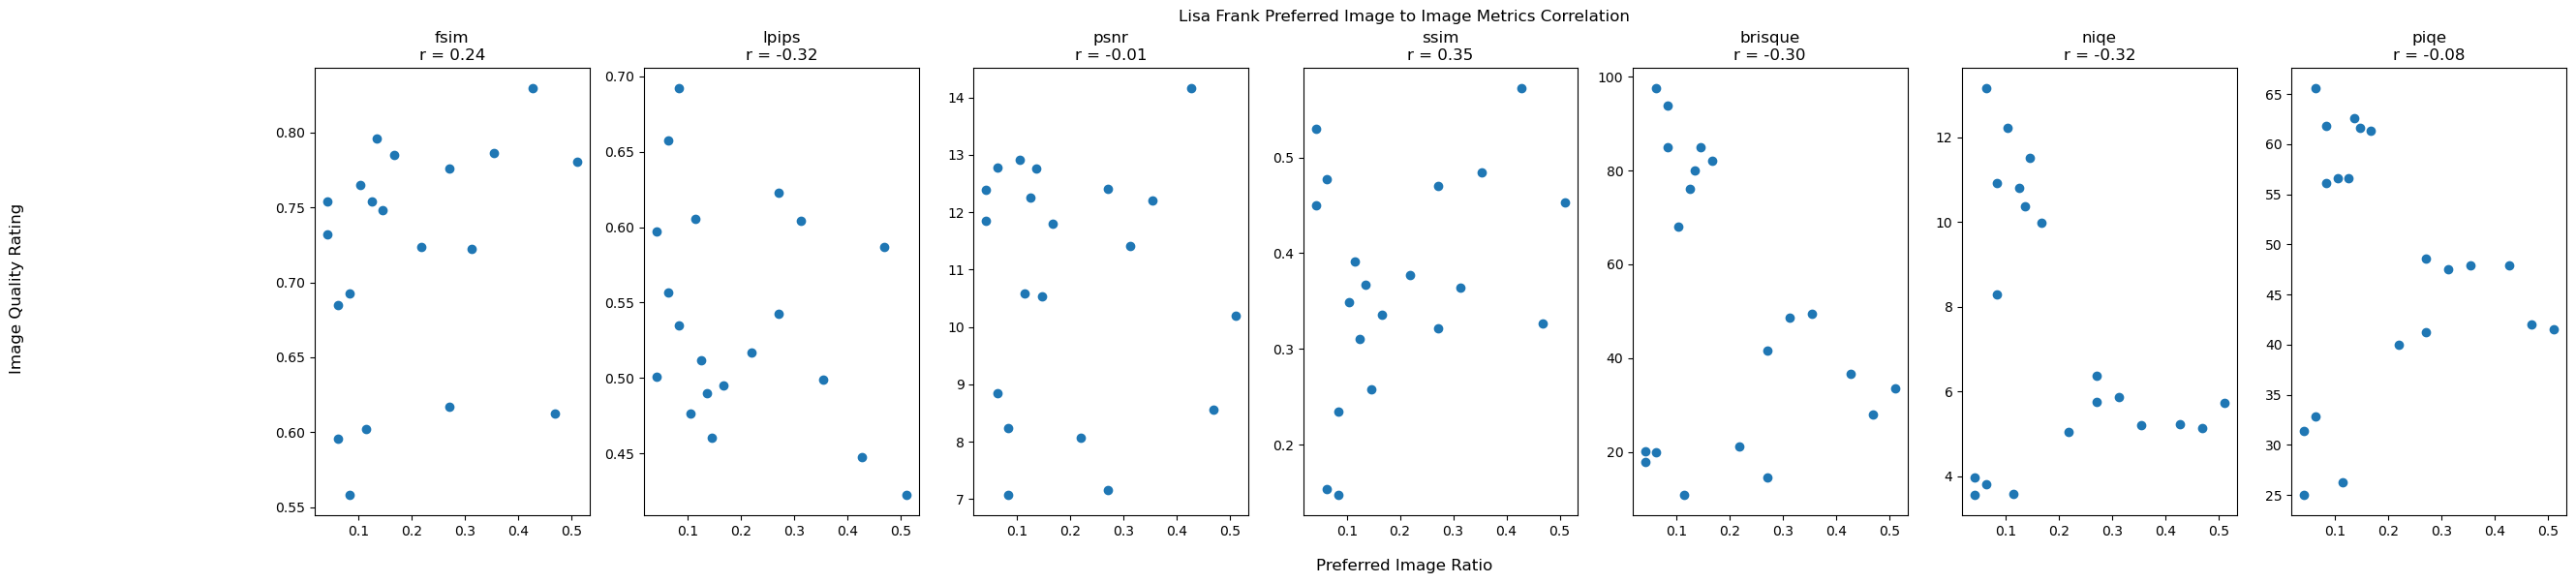

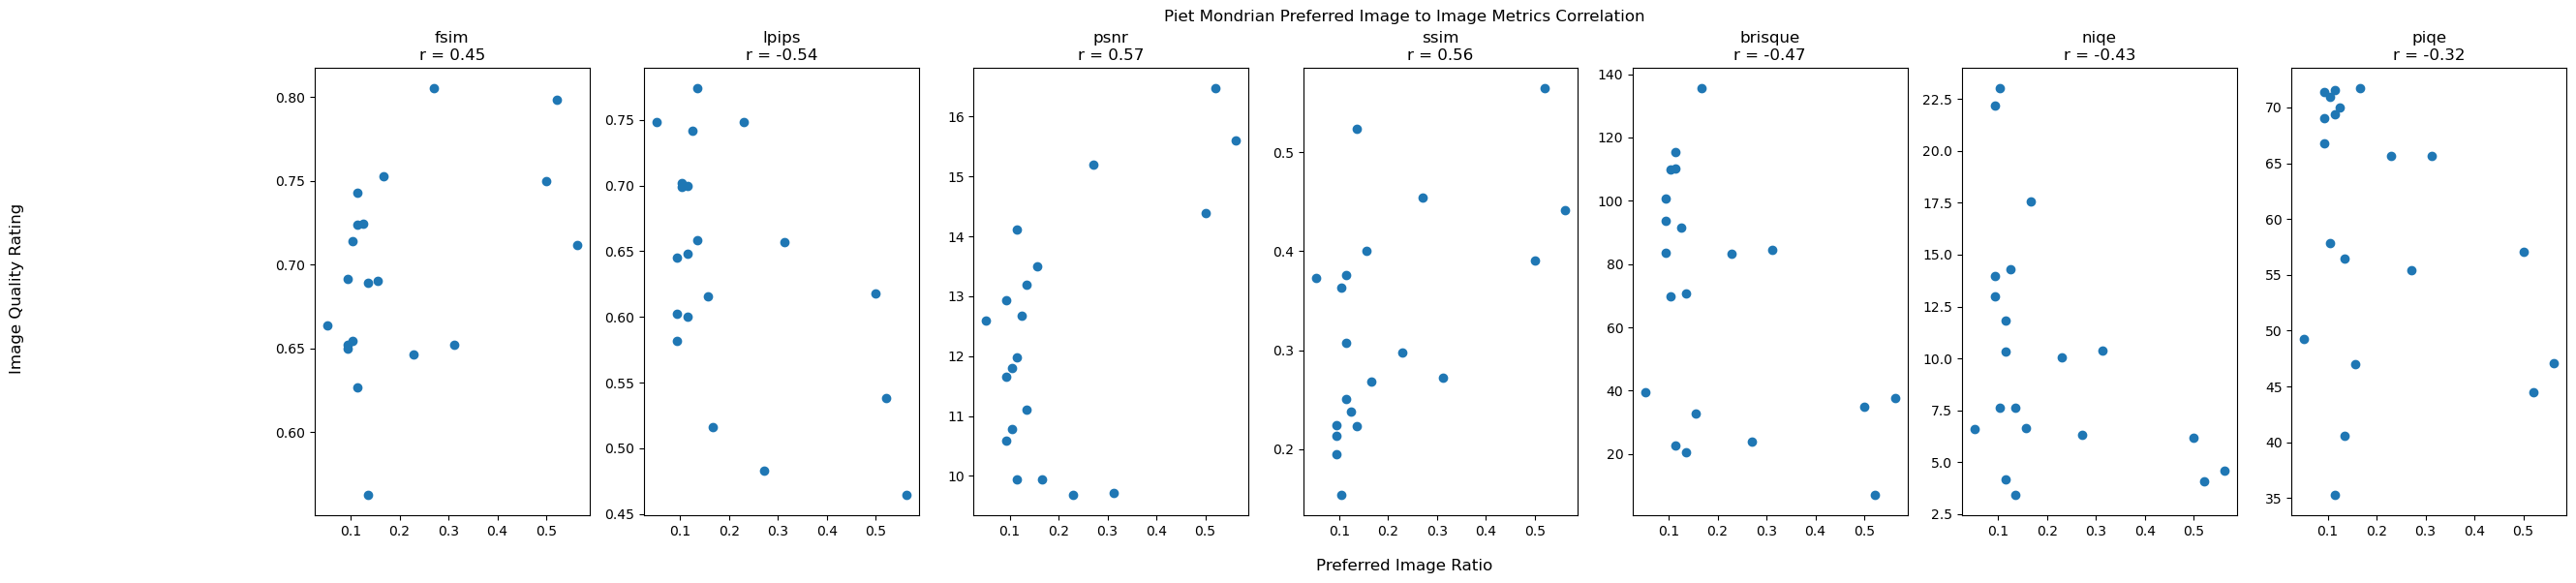

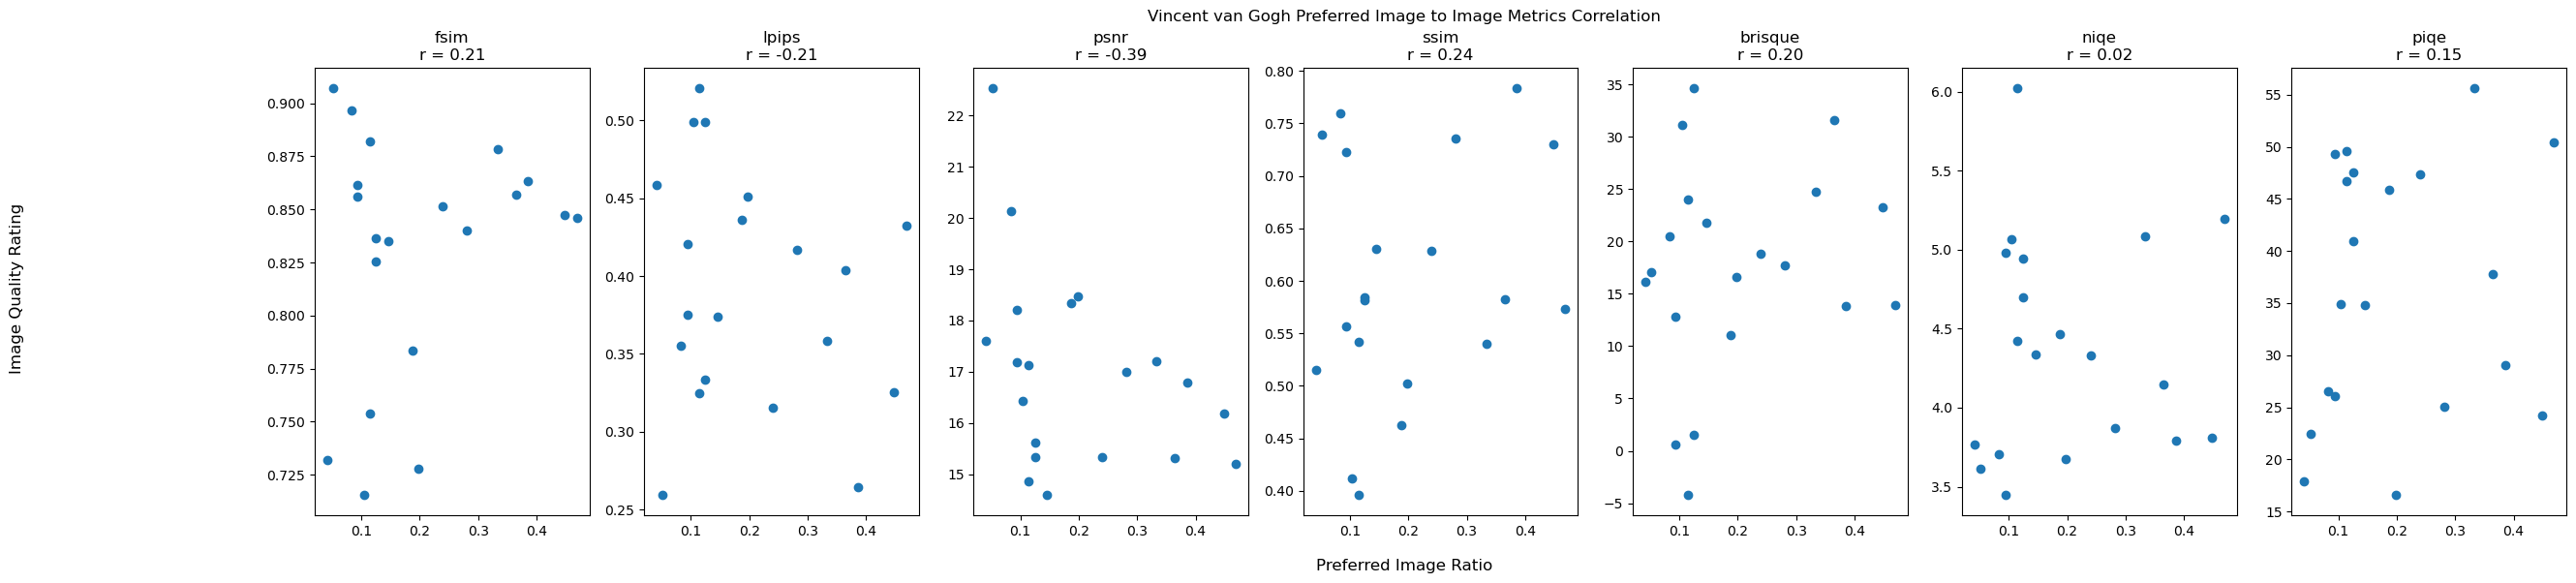

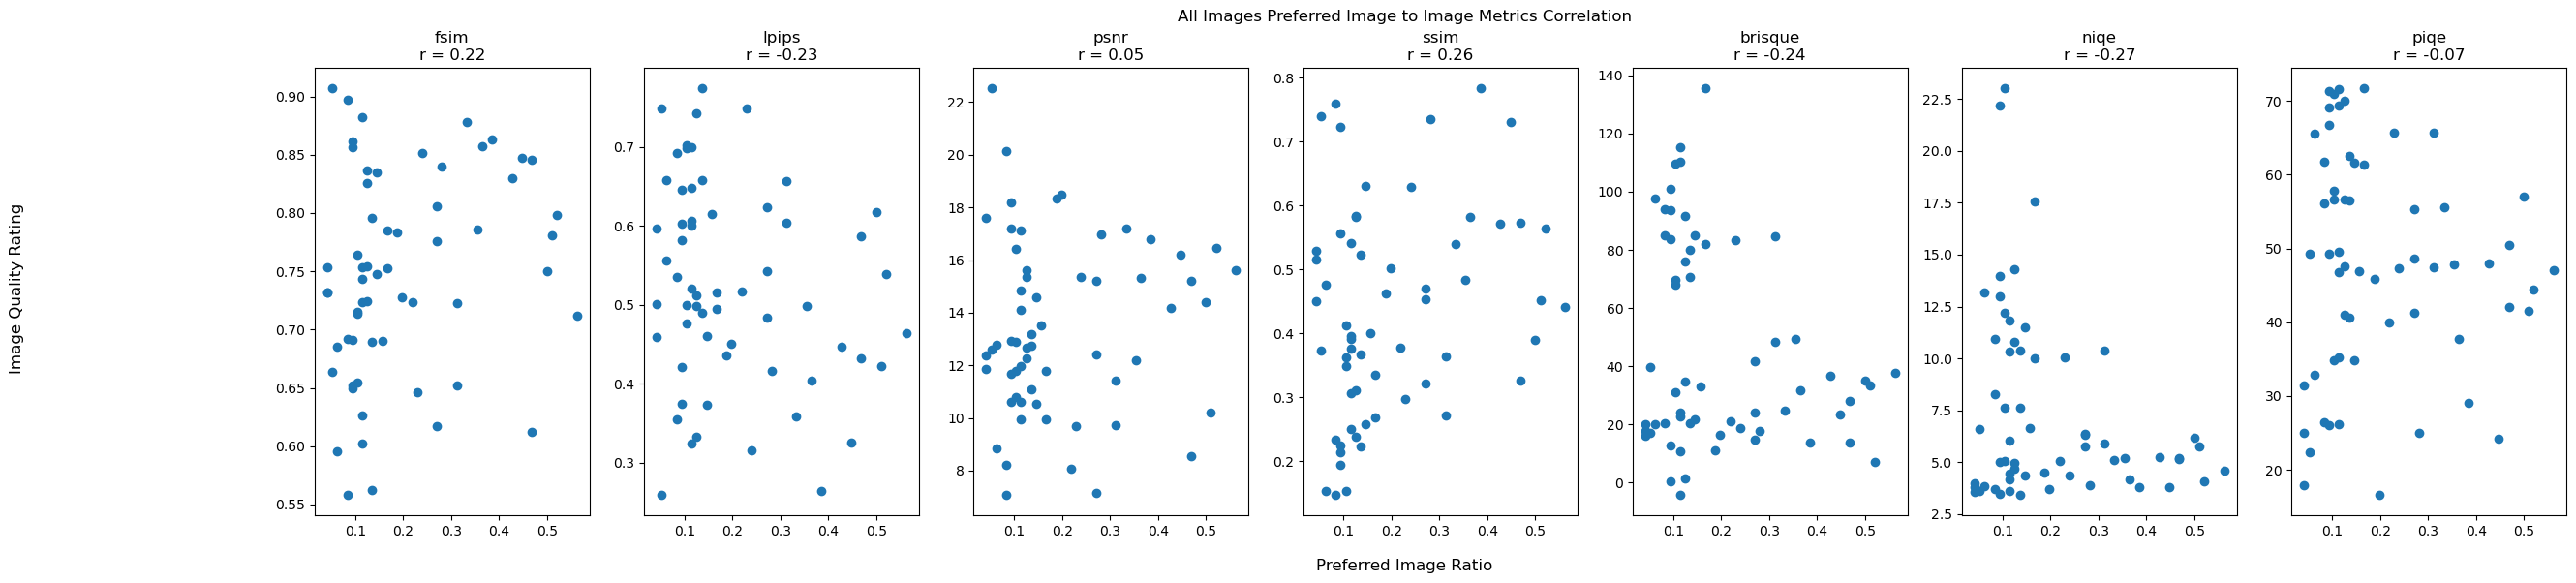

In [323]:
graph_pearson(lfiq_data, metric_count, LF_like_ratio, "Lisa Frank Preferred Image to Image Metrics Correlation", "Preferred Image Ratio","Image Quality Rating")
graph_pearson(pmiq_data, metric_count, PM_like_ratio, "Piet Mondrian Preferred Image to Image Metrics Correlation", "Preferred Image Ratio","Image Quality Rating")
graph_pearson(vgiq_data, metric_count, VG_like_ratio, "Vincent van Gogh Preferred Image to Image Metrics Correlation", "Preferred Image Ratio","Image Quality Rating")
graph_pearson(alliq_data, metric_count, all_like_ratio, "All Images Preferred Image to Image Metrics Correlation", "Preferred Image Ratio","Image Quality Rating")

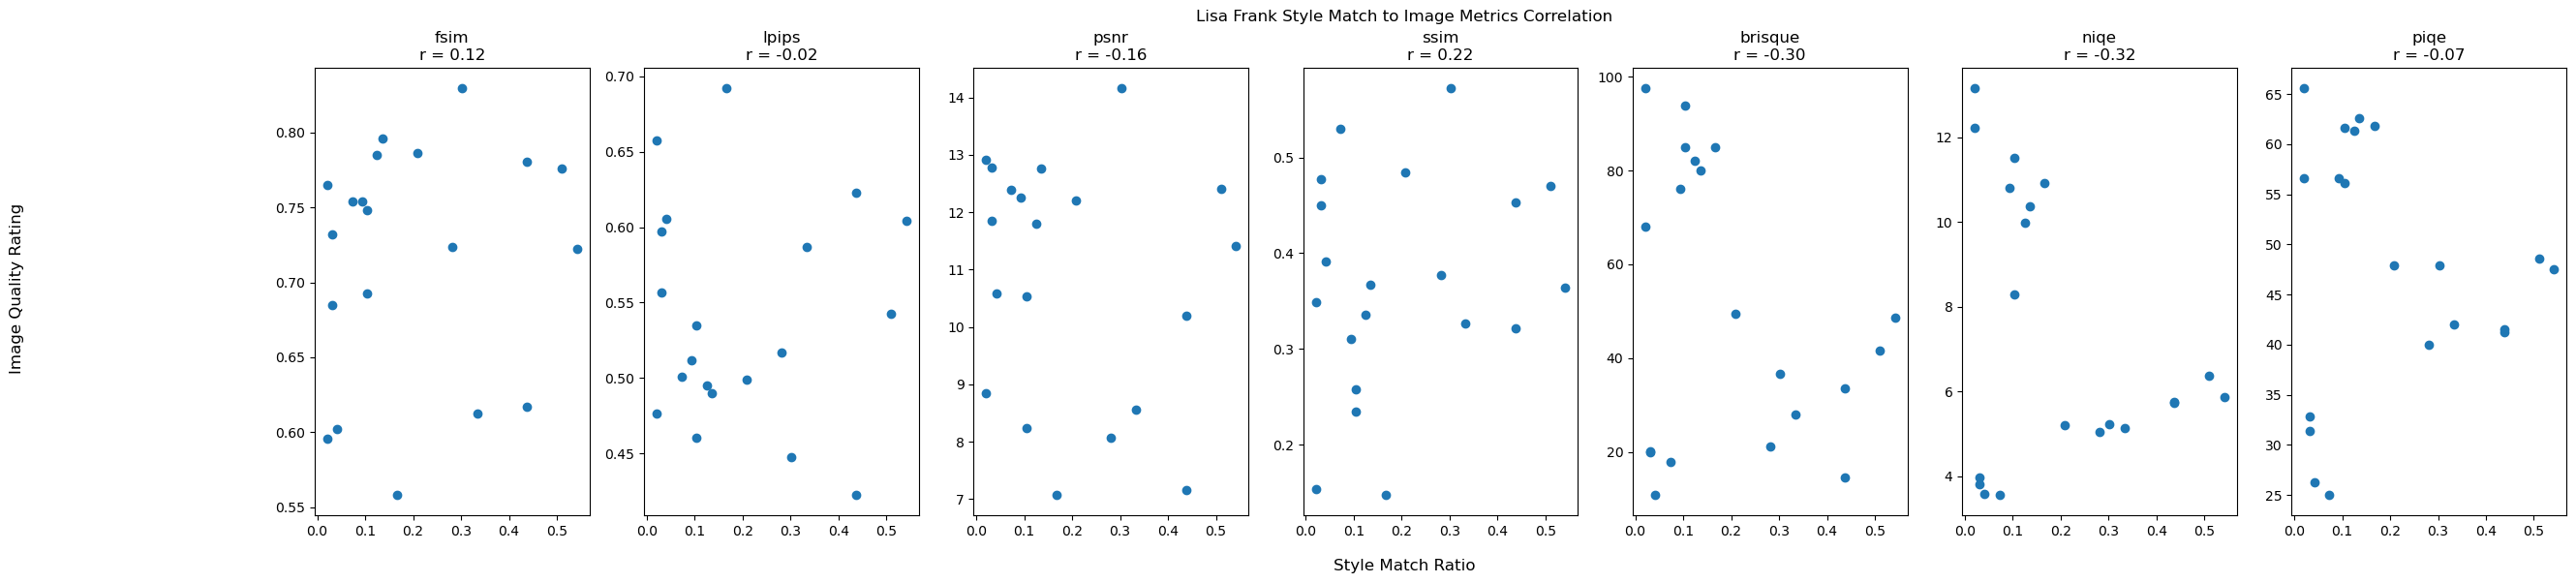

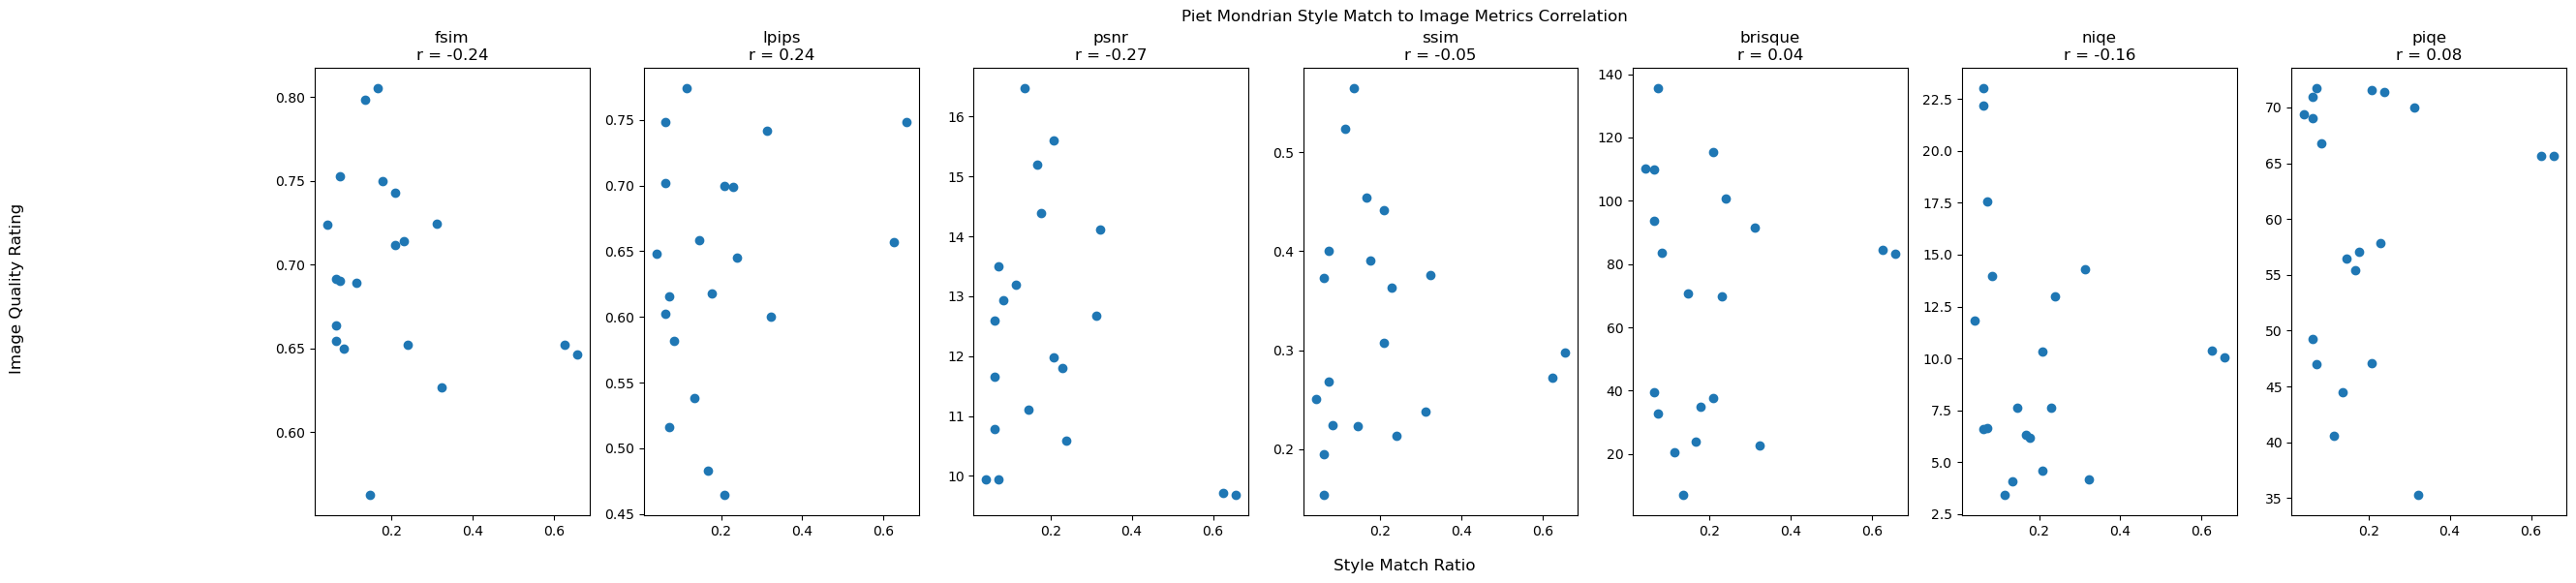

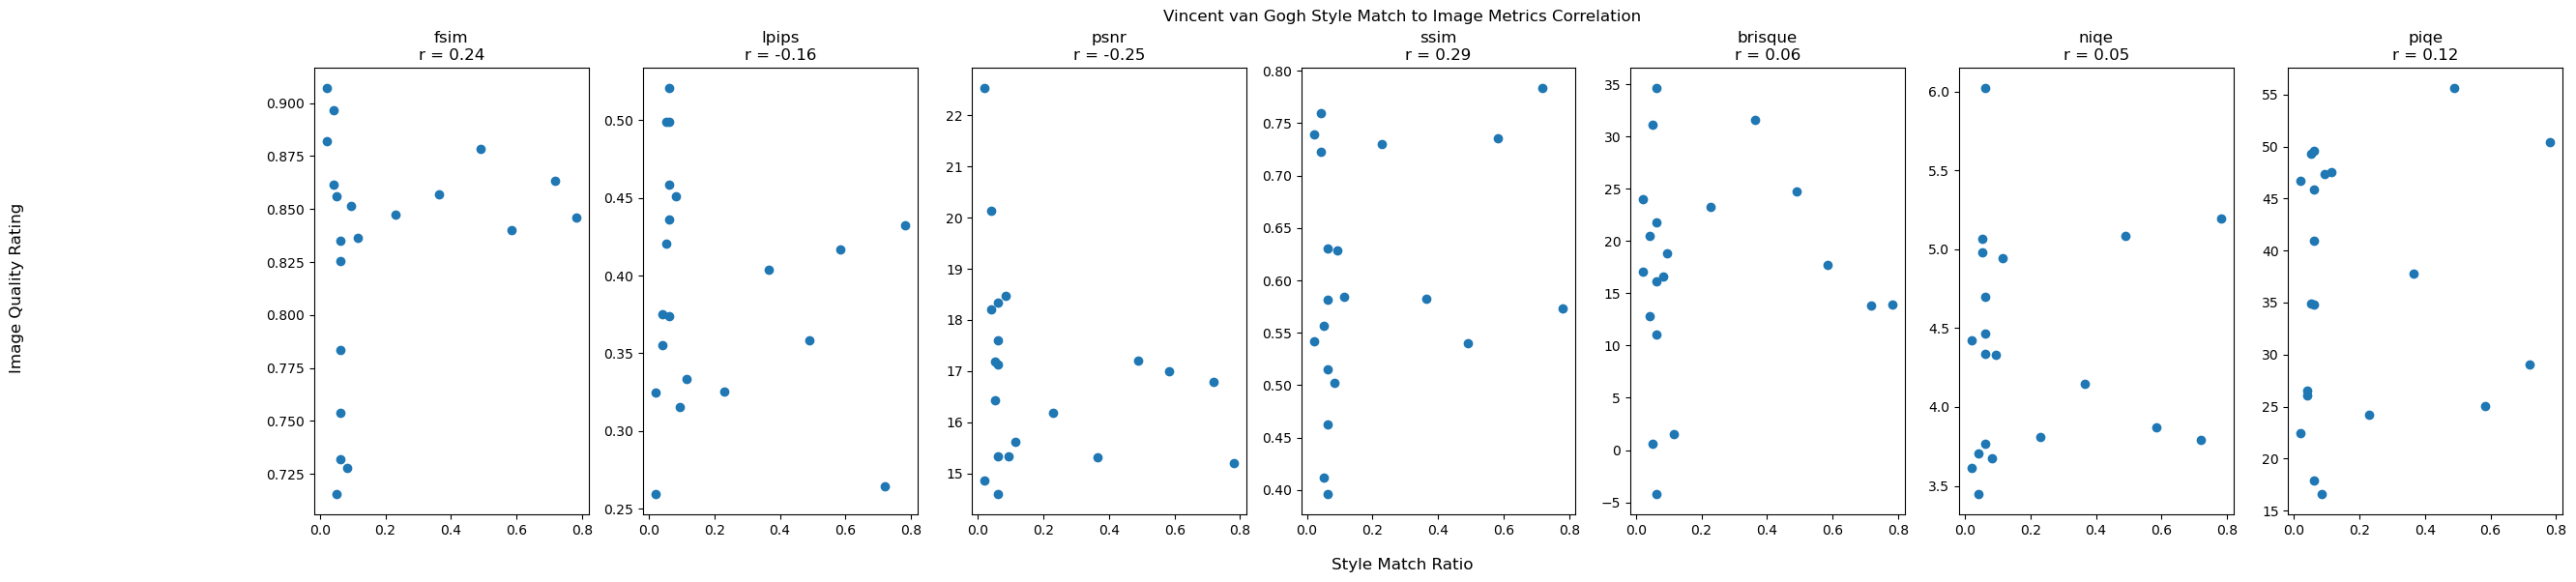

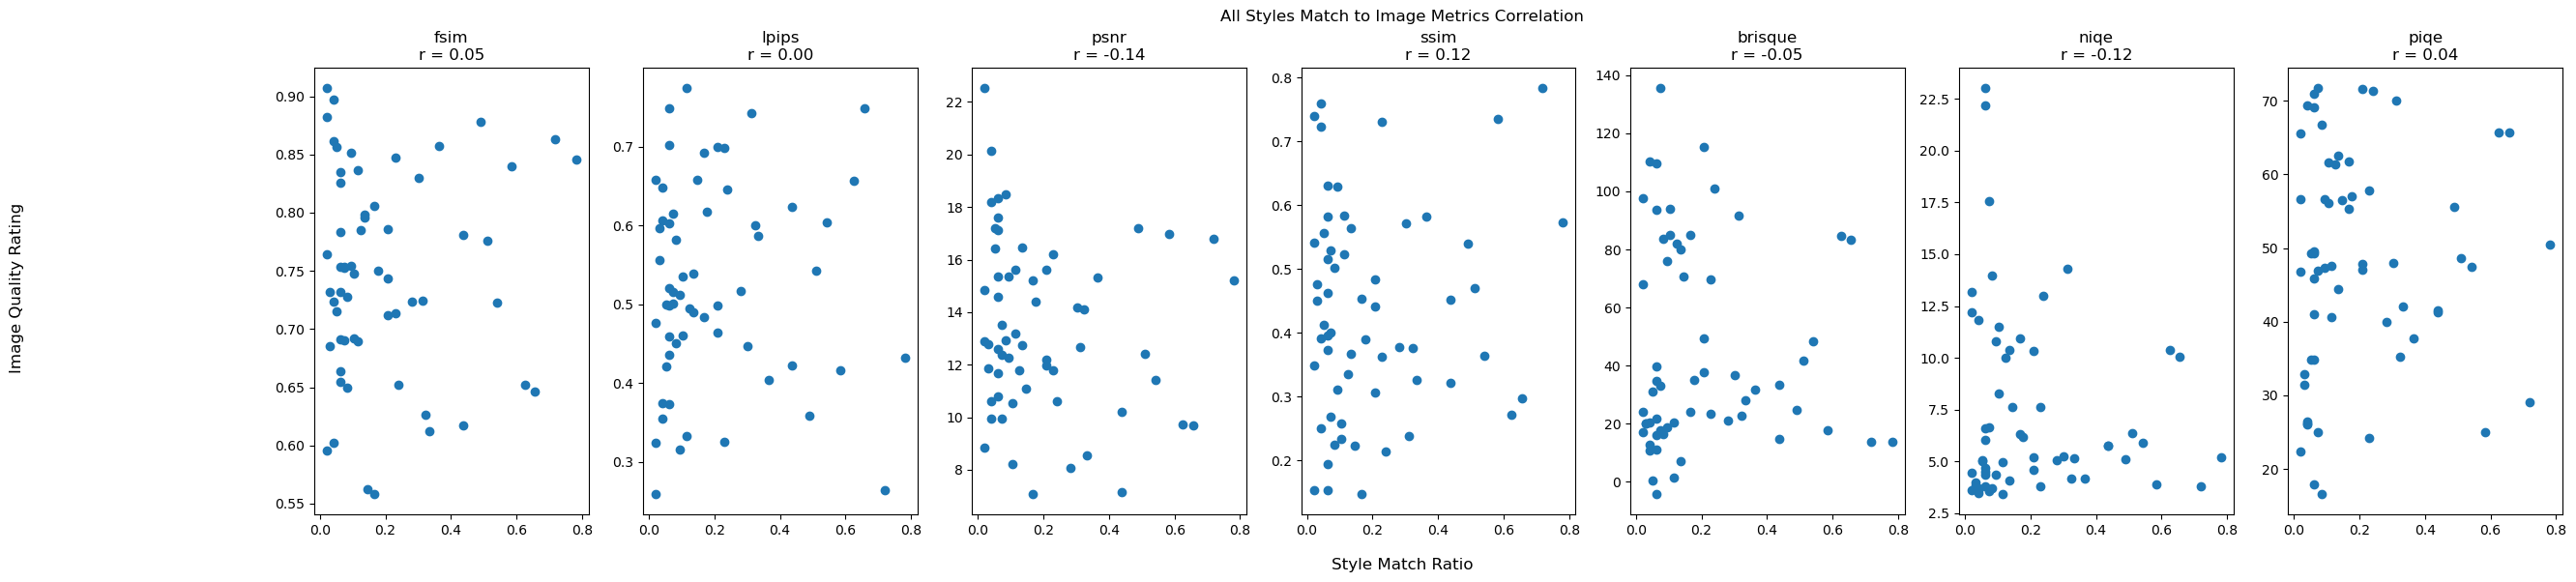

In [324]:
graph_pearson(lfiq_data, metric_count, LF_style_ratio, "Lisa Frank Style Match to Image Metrics Correlation", "Style Match Ratio","Image Quality Rating")
graph_pearson(pmiq_data, metric_count, PM_style_ratio, "Piet Mondrian Style Match to Image Metrics Correlation", "Style Match Ratio","Image Quality Rating")
graph_pearson(vgiq_data, metric_count, VG_style_ratio, "Vincent van Gogh Style Match to Image Metrics Correlation", "Style Match Ratio","Image Quality Rating")
graph_pearson(alliq_data, metric_count, all_style_ratio, "All Styles Match to Image Metrics Correlation", "Style Match Ratio","Image Quality Rating")

In [325]:
#Do people like what best matches?
#style_to_like = np.corrcoef(LF_style_ratio, LF_like_ratio)[0,1]
#print(metrics)
#print(pc_style)
#print(pc_like)
#print(style_to_like)

In [326]:
###BELOW HERE WE LOOK AT ACCURACY CORRELATIONS###
#Accuracy Rates are from Pytorch Documentation on September 17 2025
Accuracy1 = [77.138,69.778,82.284,58.178,72.376]
A1 = np.tile(Accuracy1,image_number) / 100
Accuracy5 = [93.56,89.53,96.002,80.624,90.876]
A5 = np.tile(Accuracy5,image_number) / 100

A1all = np.tile(Accuracy1,all_image_number) / 100
A5all = np.tile(Accuracy5,all_image_number) / 100

In [327]:
#Correlations Between What People Like and CNN Accuracy
r = np.corrcoef(LF_like_ratio, A1)[0,1]
#print(r)
r = np.corrcoef(LF_like_ratio, A5)[0,1]
#print(r)
r = np.corrcoef(PM_like_ratio, A1)[0,1]
#print(r)
r = np.corrcoef(PM_like_ratio, A5)[0,1]
#print(r)
r = np.corrcoef(VG_like_ratio, A1)[0,1]
#print(r)
r = np.corrcoef(VG_like_ratio, A5)[0,1]
#print(r)

r = np.corrcoef(all_like_ratio, A1all)[0,1]
#print(r)
r = np.corrcoef(all_like_ratio, A5all)[0,1]
#print(r)



0.722871253590771
0.6517855239220448
0.6786724119640888
0.6126097382837967
0.681065584412855
0.662813485082465
0.6931367562089633
0.6401735925567278


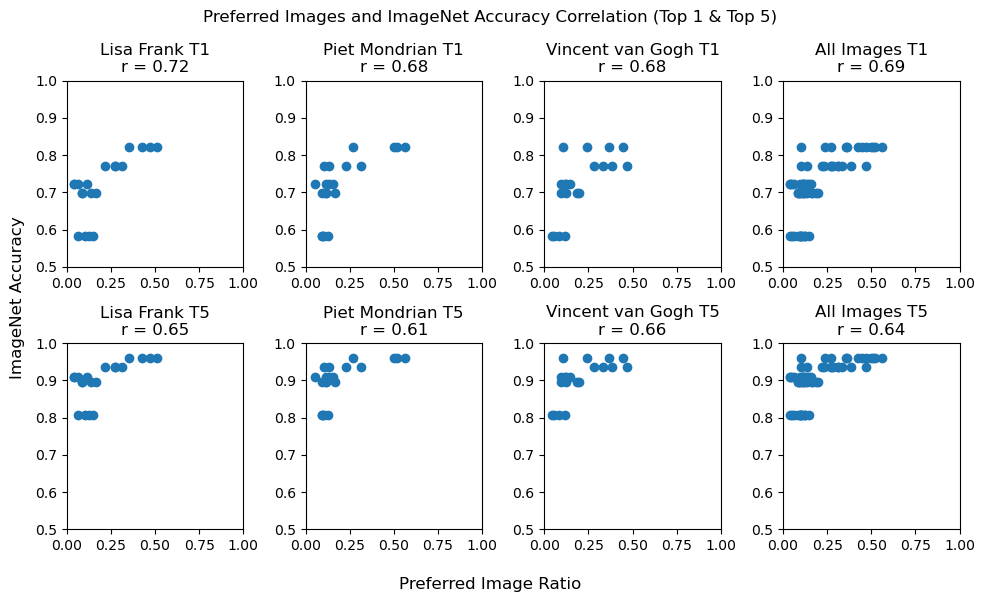

In [328]:
fig, axs = plt.subplots(2, 4, figsize=(10, 6))
fig.suptitle("Preferred Images and ImageNet Accuracy Correlation (Top 1 & Top 5)")
response_count = LF_like_survey.shape[0]
# Plot each graph

axs[0,0].scatter(LF_like_ratio, A1)
r = np.corrcoef(LF_like_ratio, A1)[0,1]
axs[0,0].set_title(f"Lisa Frank T1\nr = {r:.2f}")
axs[1,0].scatter(LF_like_ratio, A5)
r = np.corrcoef(LF_like_ratio, A5)[0,1]
axs[1,0].set_title(f"Lisa Frank T5\nr = {r:.2f}")

axs[0,1].scatter(PM_like_ratio, A1)
r = np.corrcoef(PM_like_ratio, A1)[0,1]
axs[0,1].set_title(f"Piet Mondrian T1\nr = {r:.2f}")
axs[1,1].scatter(PM_like_ratio, A5)
r = np.corrcoef(PM_like_ratio, A5)[0,1]
axs[1,1].set_title(f"Piet Mondrian T5\nr = {r:.2f}")

axs[0,2].scatter(VG_like_ratio, A1)
r = np.corrcoef(VG_like_ratio, A1)[0,1]
axs[0,2].set_title(f"Vincent van Gogh T1\nr = {r:.2f}")
axs[1,2].scatter(VG_like_ratio, A5)
r = np.corrcoef(VG_like_ratio, A5)[0,1]
axs[1,2].set_title(f"Vincent van Gogh T5\nr = {r:.2f}")

axs[0,3].scatter(all_like_ratio, A1all)
r = np.corrcoef(all_like_ratio, A1all)[0,1]
axs[0,3].set_title(f"All Images T1\nr = {r:.2f}")
axs[1,3].scatter(all_like_ratio, A5all)
r = np.corrcoef(all_like_ratio, A5all)[0,1]
axs[1,3].set_title(f"All Images T5\nr = {r:.2f}")


for ax in axs[0].flat:
    ax.set_xlim(0,1)
    ax.set_ylim(0.5,1)
for ax in axs[1].flat:
    ax.set_xlim(0,1)
    ax.set_ylim(0.5,1)

fig.supxlabel("Preferred Image Ratio")
fig.supylabel("ImageNet Accuracy")
plt.tight_layout()

fig.savefig("./Graphs/PreferredImagesandImageNetAccuracyCorrelation.png")
plt.show()


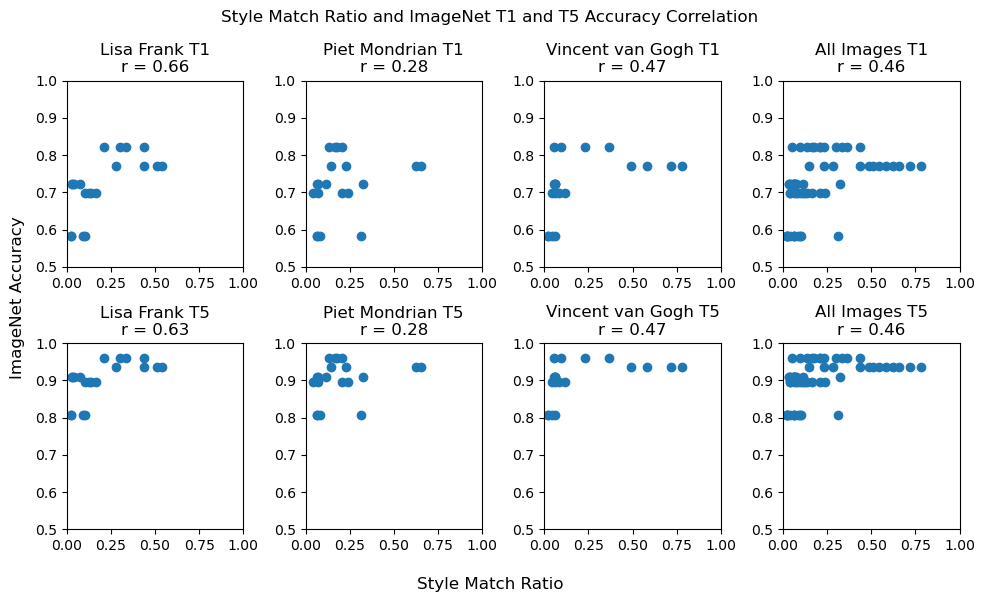

In [329]:
fig, axs = plt.subplots(2, 4, figsize=(10, 6))
fig.suptitle("Style Match Ratio and ImageNet T1 and T5 Accuracy Correlation")
# Plot each graph

axs[0,0].scatter(LF_style_ratio, A1)
r = np.corrcoef(LF_style_ratio, A1)[0,1]
axs[0,0].set_title(f"Lisa Frank T1\nr = {r:.2f}")
axs[1,0].scatter(LF_style_ratio, A5)
r = np.corrcoef(LF_style_ratio, A5)[0,1]
axs[1,0].set_title(f"Lisa Frank T5\nr = {r:.2f}")

axs[0,1].scatter(PM_style_ratio, A1)
r = np.corrcoef(PM_style_ratio, A1)[0,1]
axs[0,1].set_title(f"Piet Mondrian T1\nr = {r:.2f}")
axs[1,1].scatter(PM_style_ratio, A5)
r = np.corrcoef(PM_style_ratio, A5)[0,1]
axs[1,1].set_title(f"Piet Mondrian T5\nr = {r:.2f}")

axs[0,2].scatter(VG_style_ratio, A1)
r = np.corrcoef(VG_style_ratio, A1)[0,1]
axs[0,2].set_title(f"Vincent van Gogh T1\nr = {r:.2f}")
axs[1,2].scatter(VG_style_ratio, A5)
r = np.corrcoef(VG_style_ratio, A5)[0,1]
axs[1,2].set_title(f"Vincent van Gogh T5\nr = {r:.2f}")

axs[0,3].scatter(all_style_ratio, A1all)
r = np.corrcoef(all_style_ratio, A1all)[0,1]
axs[0,3].set_title(f"All Images T1\nr = {r:.2f}")
axs[1,3].scatter(all_style_ratio, A5all)
r = np.corrcoef(all_style_ratio, A5all)[0,1]
axs[1,3].set_title(f"All Images T5\nr = {r:.2f}")

fig.supxlabel("Style Match Ratio")
fig.supylabel("ImageNet Accuracy")

for ax in axs[0].flat:
    ax.set_xlim(0,1)
    ax.set_ylim(0.5,1)
for ax in axs[1].flat:
    ax.set_xlim(0,1)
    ax.set_ylim(0.5,1)

plt.tight_layout()
plt.show()
fig.savefig("./Graphs/PreferredImagesAndImageNetAccuracy.png")

In [330]:
#Correlations Between Image Quality Metrics and CNN ImageNet Accuracy
pc_acc_metric = np.array([])
for col in range(0, metric_count):
    Y = lfiq_data[:,col].astype(np.float64)
    r = np.corrcoef(A1, Y)[0,1]
    pc_acc_metric = np.append(pc_acc_metric,[r])
print(metrics)
print(pc_acc_metric)

['fsim', 'lpips', 'psnr', 'ssim', 'brisque', 'niqe', 'piqe']
[ 0.1144123  -0.06872398 -0.03317599  0.58357635 -0.64162736 -0.78100101
 -0.51274558]


In [331]:
pc_acc_metric = np.array([])
for col in range(0, metric_count):
    Y = lfiq_data[:,col].astype(np.float64)
    r = np.corrcoef(A5, Y)[0,1]
    pc_acc_metric = np.append(pc_acc_metric,[r])
print(metrics)
print(pc_acc_metric)

['fsim', 'lpips', 'psnr', 'ssim', 'brisque', 'niqe', 'piqe']
[ 0.09108881 -0.02870807 -0.04831151  0.56747014 -0.63694222 -0.79097573
 -0.52463942]


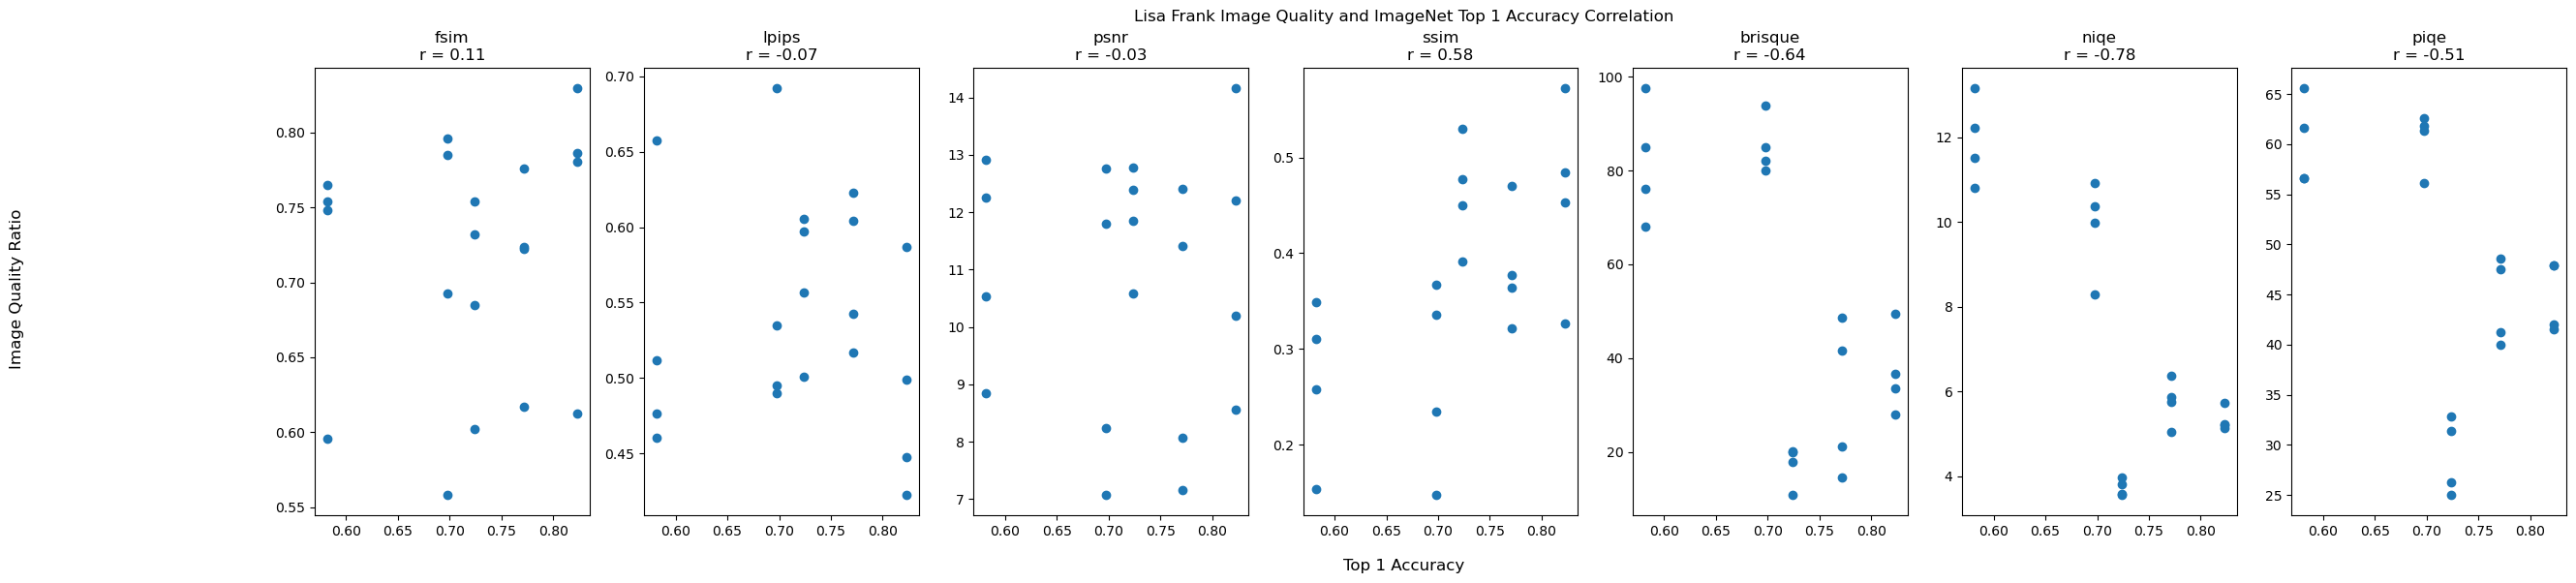

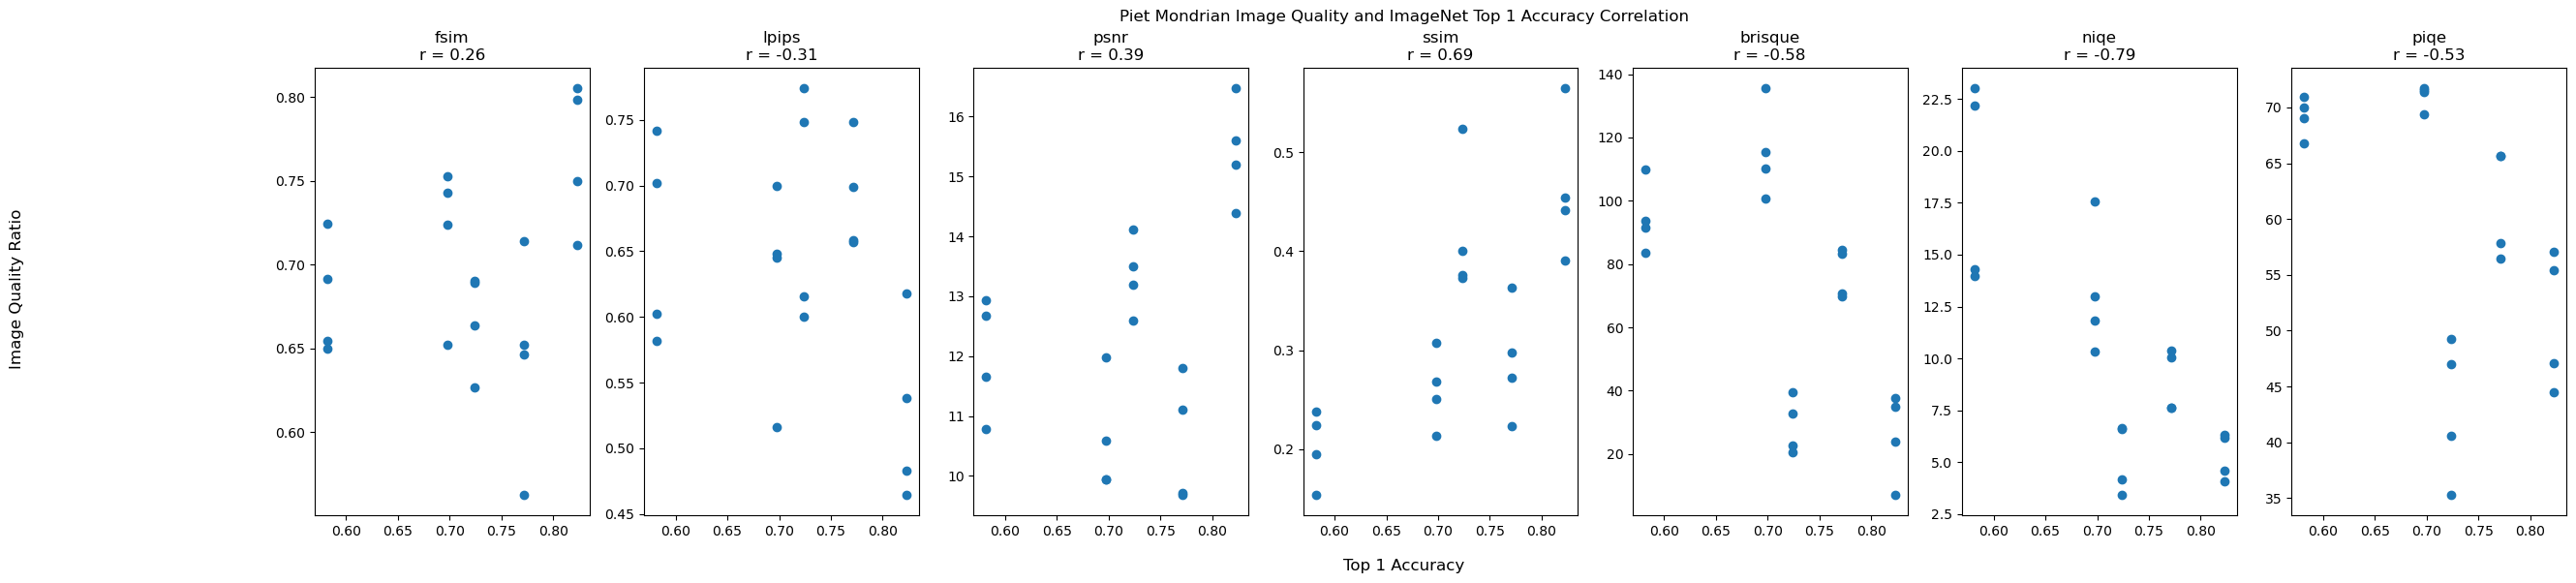

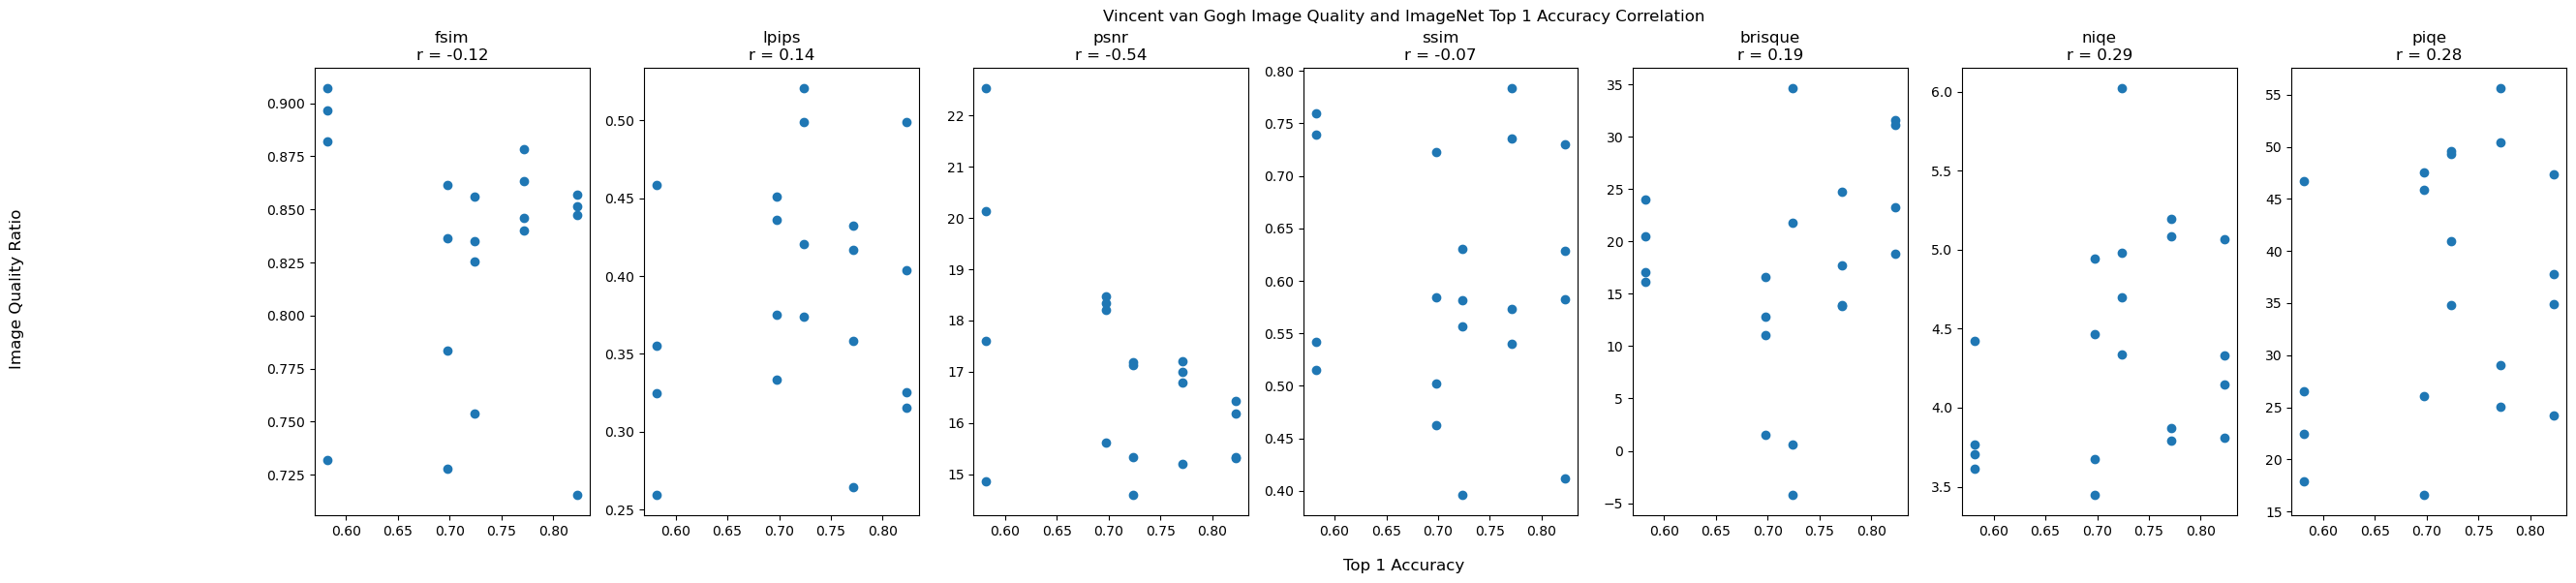

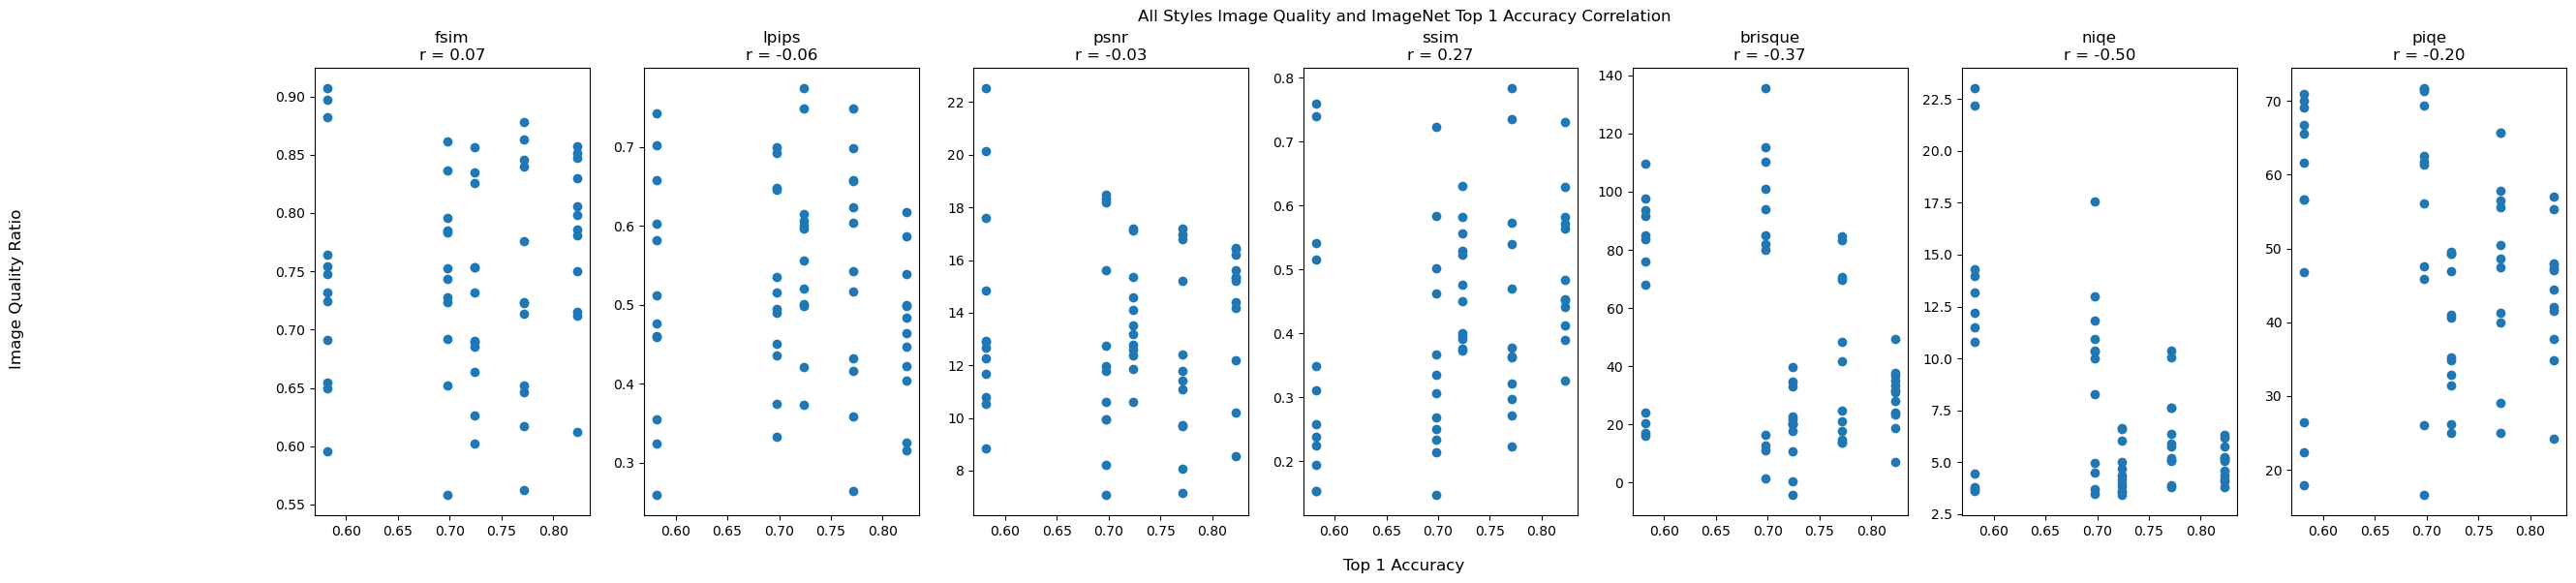

In [332]:
graph_pearson(lfiq_data, metric_count, A1, "Lisa Frank Image Quality and ImageNet Top 1 Accuracy Correlation", "Top 1 Accuracy", "Image Quality Ratio")
graph_pearson(pmiq_data, metric_count, A1, "Piet Mondrian Image Quality and ImageNet Top 1 Accuracy Correlation", "Top 1 Accuracy", "Image Quality Ratio")
graph_pearson(vgiq_data, metric_count, A1, "Vincent van Gogh Image Quality and ImageNet Top 1 Accuracy Correlation", "Top 1 Accuracy", "Image Quality Ratio")
graph_pearson(alliq_data, metric_count, A1all, "All Styles Image Quality and ImageNet Top 1 Accuracy Correlation", "Top 1 Accuracy", "Image Quality Ratio")

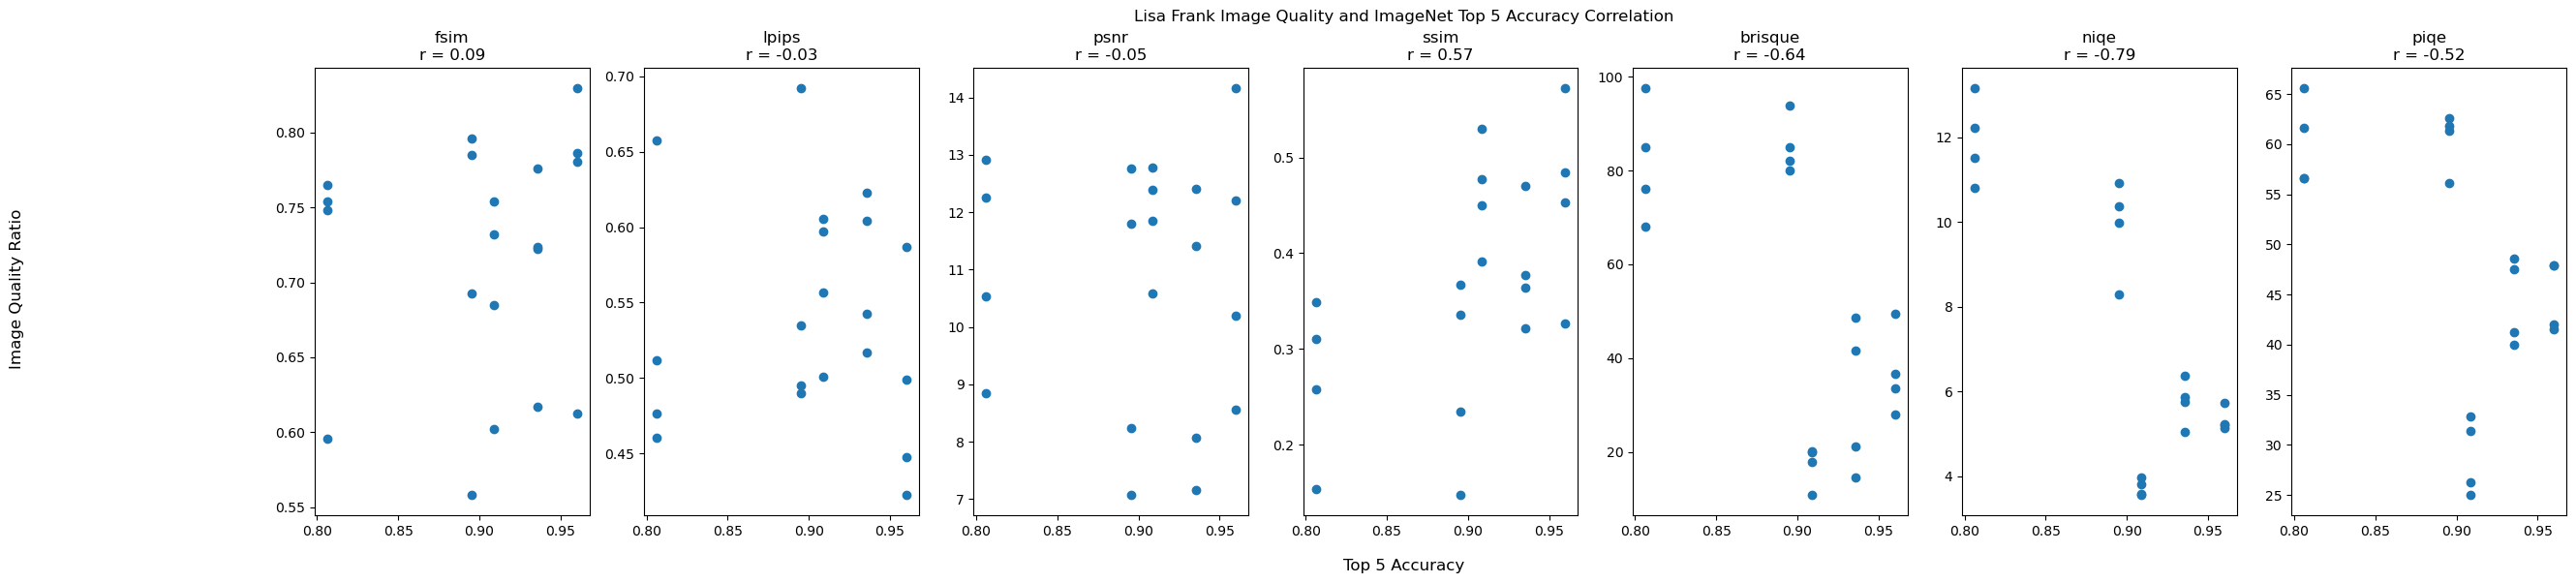

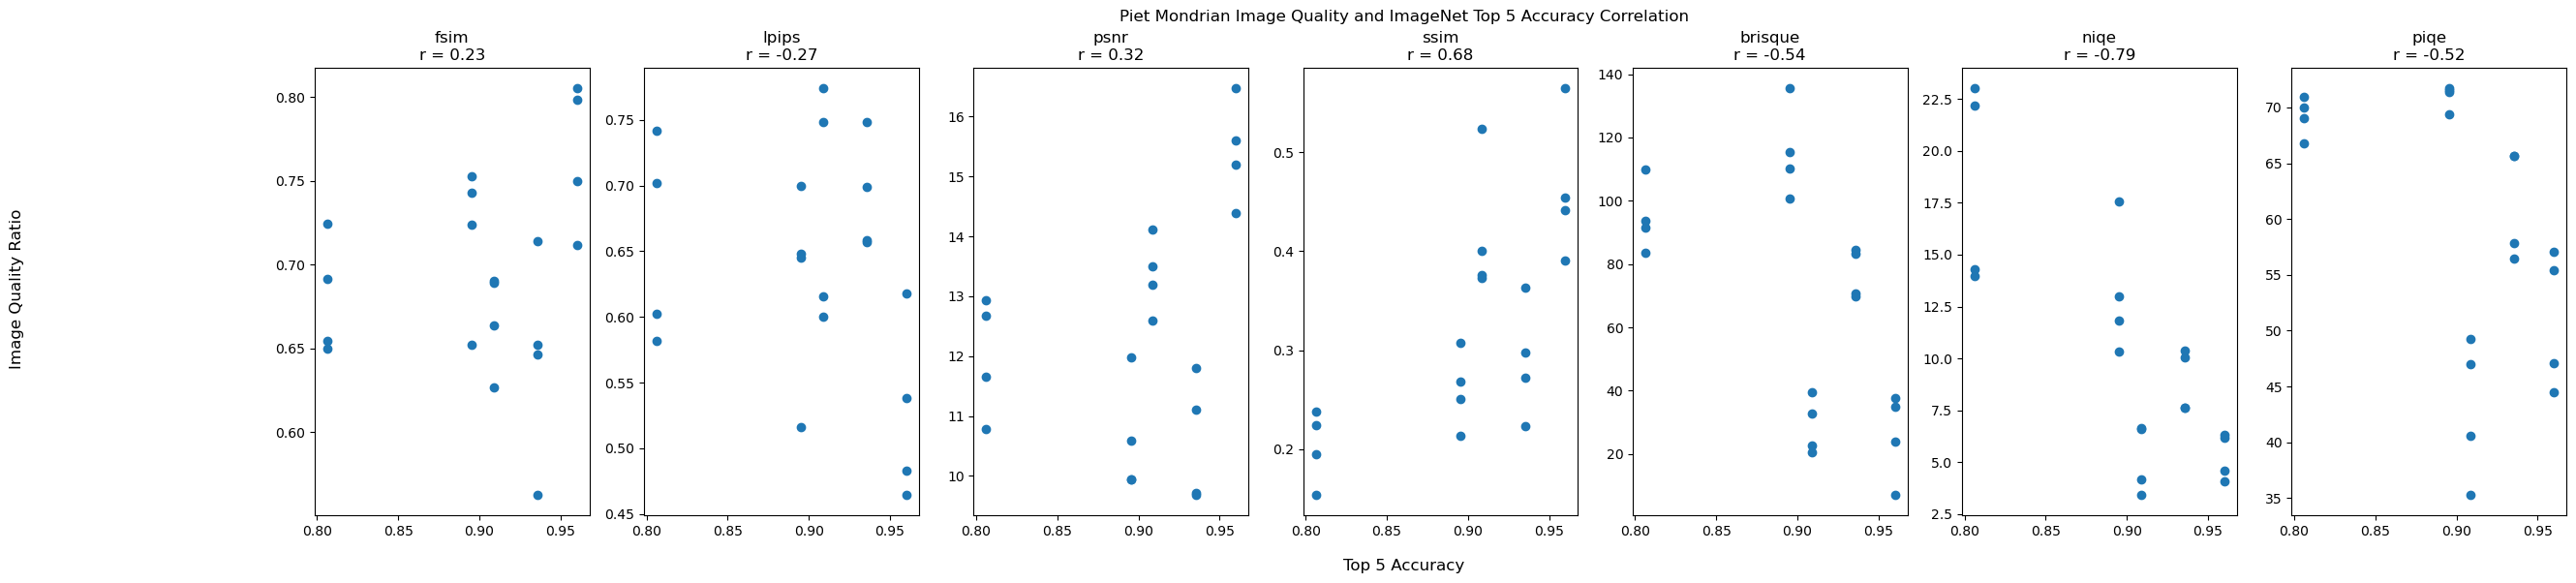

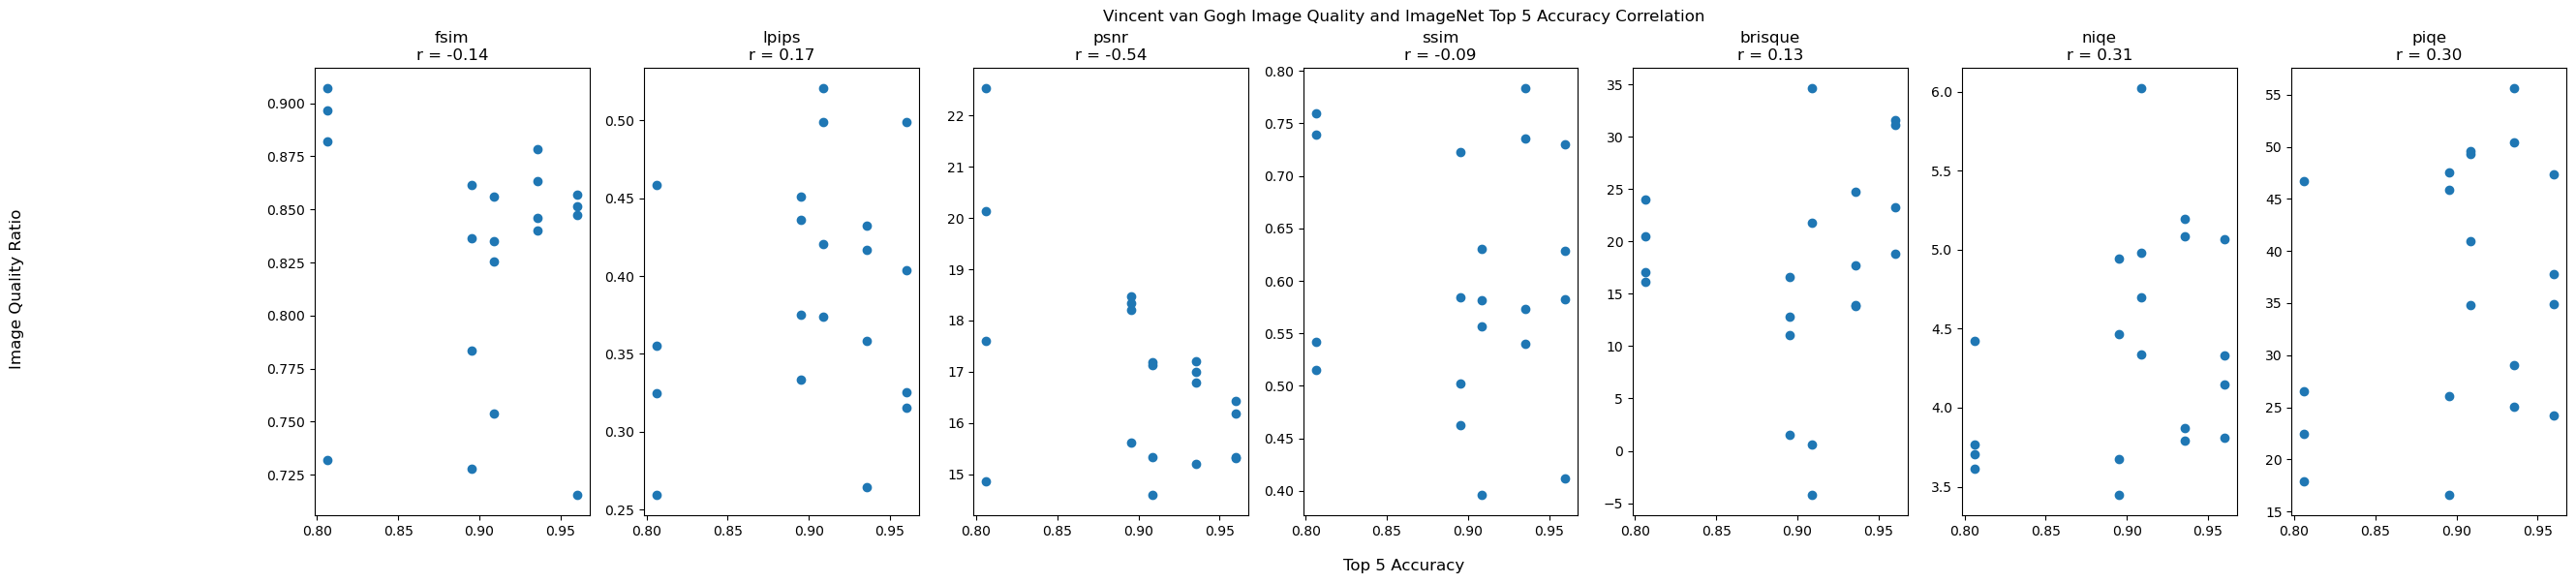

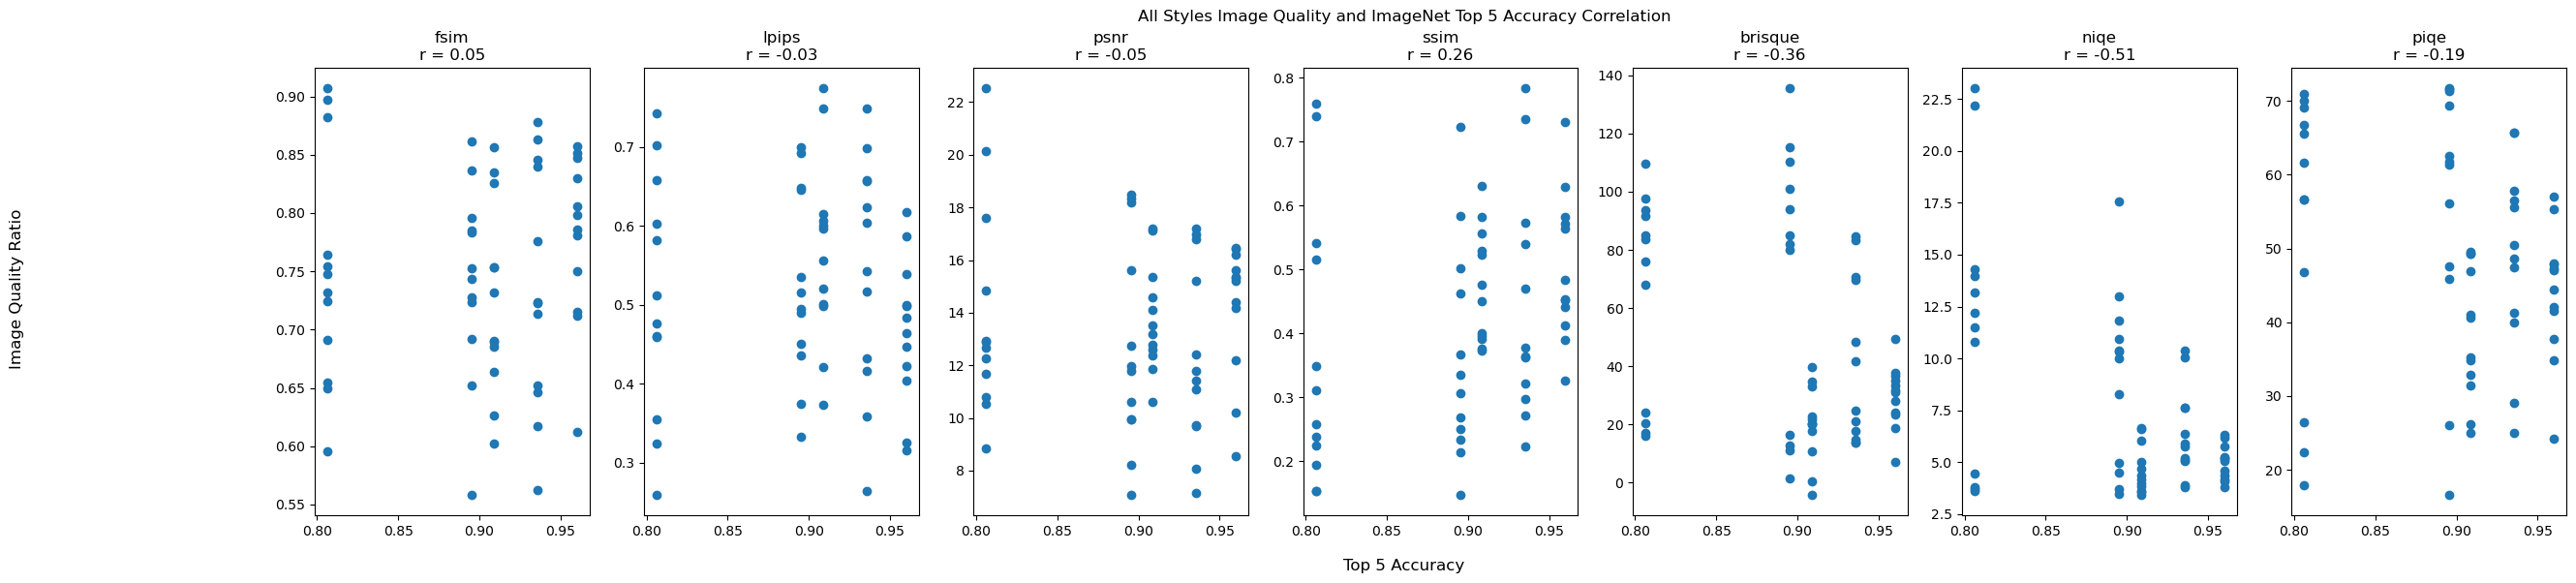

In [333]:
graph_pearson(lfiq_data, metric_count, A5, "Lisa Frank Image Quality and ImageNet Top 5 Accuracy Correlation", "Top 5 Accuracy", "Image Quality Ratio")
graph_pearson(pmiq_data, metric_count, A5, "Piet Mondrian Image Quality and ImageNet Top 5 Accuracy Correlation", "Top 5 Accuracy", "Image Quality Ratio")
graph_pearson(vgiq_data, metric_count, A5, "Vincent van Gogh Image Quality and ImageNet Top 5 Accuracy Correlation", "Top 5 Accuracy", "Image Quality Ratio")
graph_pearson(alliq_data, metric_count, A5all, "All Styles Image Quality and ImageNet Top 5 Accuracy Correlation", "Top 5 Accuracy", "Image Quality Ratio")